# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.palettes import Viridis5
import pygal
from IPython.display import SVG, display
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2

# Loading Dataset

We use pandas to read the dataset and preprocess it.

In [5]:
EmployeeAttrition_data = pd.read_csv('Employee_Attrition.csv')

In [6]:
EmployeeAttrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
EmployeeAttrition_data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [8]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

# Load the Employee Attrition dataset
df = pd.read_csv('employee_attrition.csv')

# Create a dictionary of column names and their descriptions
column_desc = {
    'Age': 'Age of the employee',
    'Attrition': 'Whether the employee has left the company or not',
    'BusinessTravel': 'Frequency of the employee travelling for business purposes',
    'DailyRate': 'Daily rate of pay',
    'Department': 'Department of the employee',
    'DistanceFromHome': 'Distance of employee from home to work in miles',
    'Education': 'Education level of the employee',
    'EducationField': 'Field of education of the employee',
    'EmployeeCount': 'Number of employees in the company',
    'EmployeeNumber': 'Employee identification number',
    'EnvironmentSatisfaction': 'Employee satisfaction level with the work environment',
    'Gender': 'Gender of the employee',
    'HourlyRate': 'Hourly rate of pay',
    'JobInvolvement': 'Level of involvement of the employee with the job',
    'JobLevel': 'Job level of the employee',
    'JobRole': 'Role of the employee in the company',
    'JobSatisfaction': 'Employee satisfaction level with the job',
    'MaritalStatus': 'Marital status of the employee',
    'MonthlyIncome': 'Monthly income of the employee',
    'MonthlyRate': 'Monthly rate of pay',
    'NumCompaniesWorked': 'Number of companies the employee has worked for',
    'Over18': 'Whether the employee is over 18 years of age or not',
    'OverTime': 'Whether the employee works overtime or not',
    'PercentSalaryHike': 'Percentage increase in salary',
    'PerformanceRating': 'Performance rating of the employee',
    'RelationshipSatisfaction': 'Employee satisfaction level with relationships at work',
    'StandardHours': 'Standard hours of work',
    'StockOptionLevel': 'Level of stock option',
    'TotalWorkingYears': 'Total years of work',
    'TrainingTimesLastYear': 'Number of times the employee was trained last year',
    'WorkLifeBalance': 'Employee satisfaction level with work-life balance',
    'YearsAtCompany': 'Number of years the employee has worked at the company',
    'YearsInCurrentRole': 'Number of years the employee has been in the current role',
    'YearsSinceLastPromotion': 'Number of years since the employee was last promoted',
    'YearsWithCurrManager': 'Number of years the employee has been with the current manager'
}

# Create a DataFrame of column names and their descriptions
df_desc = pd.DataFrame(list(column_desc.items()), columns=['Column', 'Description'])

In [9]:
from IPython.display import display

display(df_desc)

,Column,Description
0,Age,Age of the employee
1,Attrition,Whether the employee has left the company or not
2,BusinessTravel,Frequency of the employee travelling for business purposes
3,DailyRate,Daily rate of pay
4,Department,Department of the employee
5,DistanceFromHome,Distance of employee from home to work in miles
6,Education,Education level of the employee
7,EducationField,Field of education of the employee
8,EmployeeCount,Number of employees in the company
9,EmployeeNumber,Employee identification number


In [10]:
EmployeeAttrition_data.shape

(1470, 35)

In [11]:
EmployeeAttrition_data.size

51450

In [12]:
EmployeeAttrition_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [13]:
EmployeeAttrition_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [14]:
#check information about column
EmployeeAttrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
EmployeeAttrition_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [16]:
# No duplicates.
EmployeeAttrition_data.duplicated().sum()

0

Get data distribution between output classes

In [17]:
# distribution of legit transactions & fraudulent transactions
EmployeeAttrition_data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [18]:
EmployeeAttrition_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


In [19]:
print('Features: ', EmployeeAttrition_data.columns.tolist())

Features:  ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


# Data Cleaning

In [20]:
print('\nUnique values:')
print(EmployeeAttrition_data.nunique())


Unique values:
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear      

Drop EmployeeCount,EmployeeNumber,Over18,StandardHours  column because it contains unique value 1.It doesn't provide any meaningful information for analysis and can be dropped without affecting the analysis results. 

In [21]:
EmployeeAttrition_data = EmployeeAttrition_data.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1)
EmployeeAttrition_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


# Encode categorical features

In [29]:
#Columns with string values
categorical_column = ['Attrition', 'BusinessTravel', 'Department','EducationField',
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

numeric_column = ['Age', 'DailyRate', 
                  'DistanceFromHome', 'Education',
                  'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 
                  'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
                   'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 
                  'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany'
                  , 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [30]:
#Deep copy the original data
data_encoded = EmployeeAttrition_data.copy(deep=True)
#Use Scikit-learn label encoding to encode character data
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        data_encoded[col] = lab_enc.fit_transform(EmployeeAttrition_data[col])
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)

Feature Attrition
mapping {'No': 0, 'Yes': 1}
Feature BusinessTravel
mapping {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
Feature Department
mapping {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
Feature EducationField
mapping {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}
Feature Gender
mapping {'Female': 0, 'Male': 1}
Feature JobRole
mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
Feature MaritalStatus
mapping {'Divorced': 0, 'Married': 1, 'Single': 2}
Feature OverTime
mapping {'No': 0, 'Yes': 1}


In [31]:
data_encoded[numeric_column].describe().transpose().rename(columns={'count': 'cnt', 'mean': 'avg', 'std': 'stdev', 'min': 'min_val', '25%': 'q1', '50%': 'median', '75%': 'q3', 'max': 'max_val'})

,cnt,avg,stdev,min_val,q1,median,q3,max_val
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


In [28]:
data_encoded[categorical_column].describe().transpose().rename(columns={'count': 'cnt', 'mean': 'avg', 'std': 'stdev', 'min': 'min_val', '25%': 'q1', '50%': 'median', '75%': 'q3', 'max': 'max_val'})

,cnt,avg,stdev,min_val,q1,median,q3,max_val
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.0,1.0
BusinessTravel,1470.0,1.607483,0.665455,0.0,1.0,2.0,2.0,2.0
Department,1470.0,1.260544,0.527792,0.0,1.0,1.0,2.0,2.0
EducationField,1470.0,2.247619,1.331369,0.0,1.0,2.0,3.0,5.0
Gender,1470.0,0.600000,0.490065,0.0,0.0,1.0,1.0,1.0
JobRole,1470.0,4.458503,2.461821,0.0,2.0,5.0,7.0,8.0
MaritalStatus,1470.0,1.097279,0.730121,0.0,1.0,1.0,2.0,2.0
OverTime,1470.0,0.282993,0.450606,0.0,0.0,0.0,1.0,1.0


In [21]:
data_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [22]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

In [23]:
# get columns with numeric data types

numeric_cols=data_encoded.select_dtypes(include=['int64']).columns.tolist()

numeric_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [24]:
EmployeeAttrition_data[numeric_cols].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


# Data Exploration

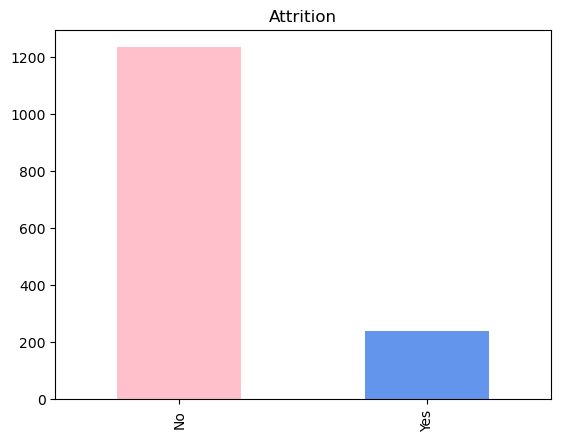

In [25]:
import matplotlib.pyplot as plt

colors = ['#FFC0CB', '#6495ED']  # set colors for the bars

EmployeeAttrition_data['Attrition'].value_counts().plot(kind='bar', color=colors).set_title('Attrition')
plt.show()

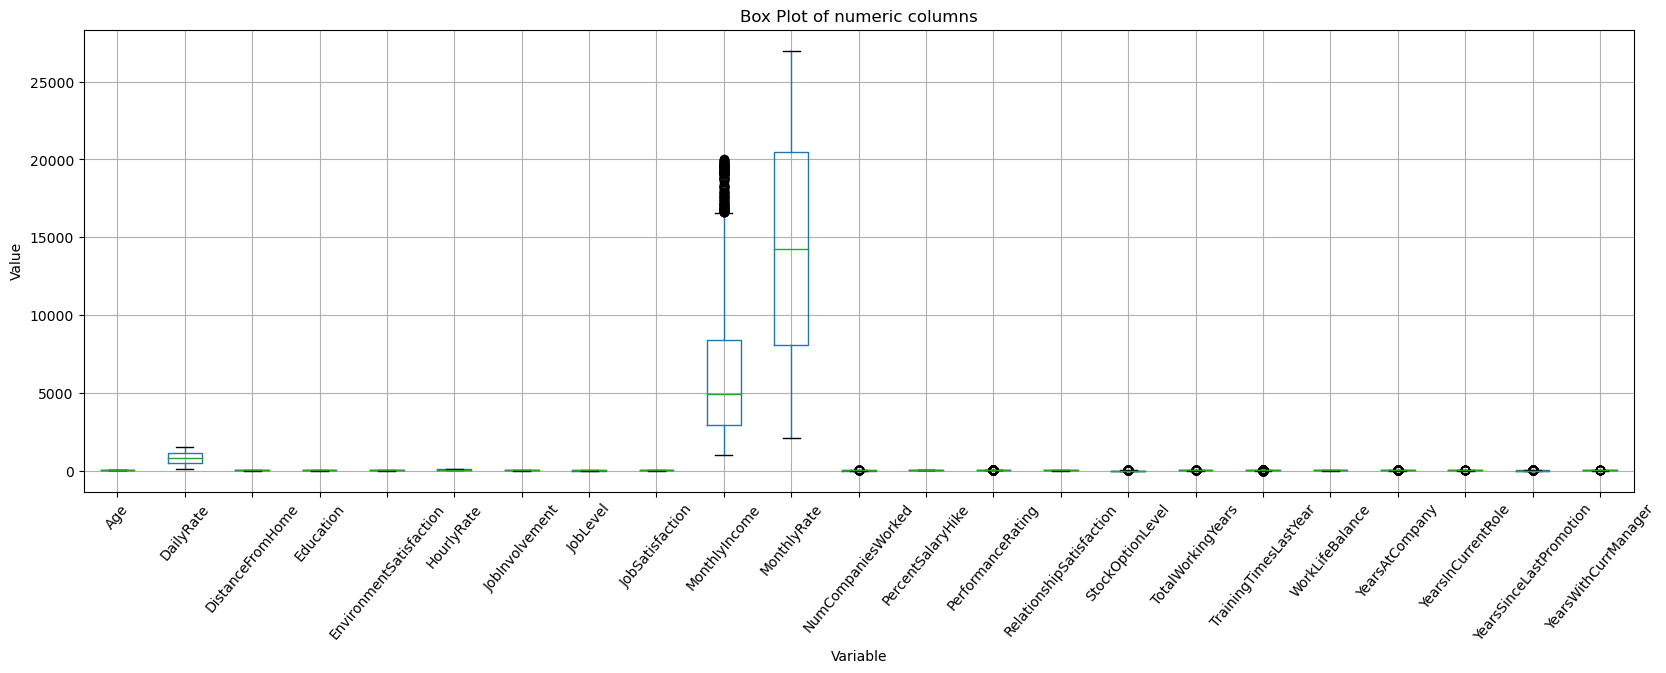

In [26]:
columns = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate',
'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike'
          ,'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',
'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

# Define the colors for the box plot
box_colors = ['lightblue', 'pink']

# Set the figure size
plt.figure(figsize=(20,6))

# Plot the boxplot with a larger container width
EmployeeAttrition_data[columns].boxplot()

# Set the title and axis labels
plt.title('Box Plot of numeric columns')
plt.xticks(rotation=50)
plt.xlabel('Variable')
plt.ylabel('Value')

# Show the plot
plt.show()

In [27]:
data_correlation = data_encoded.corr()

<AxesSubplot:>

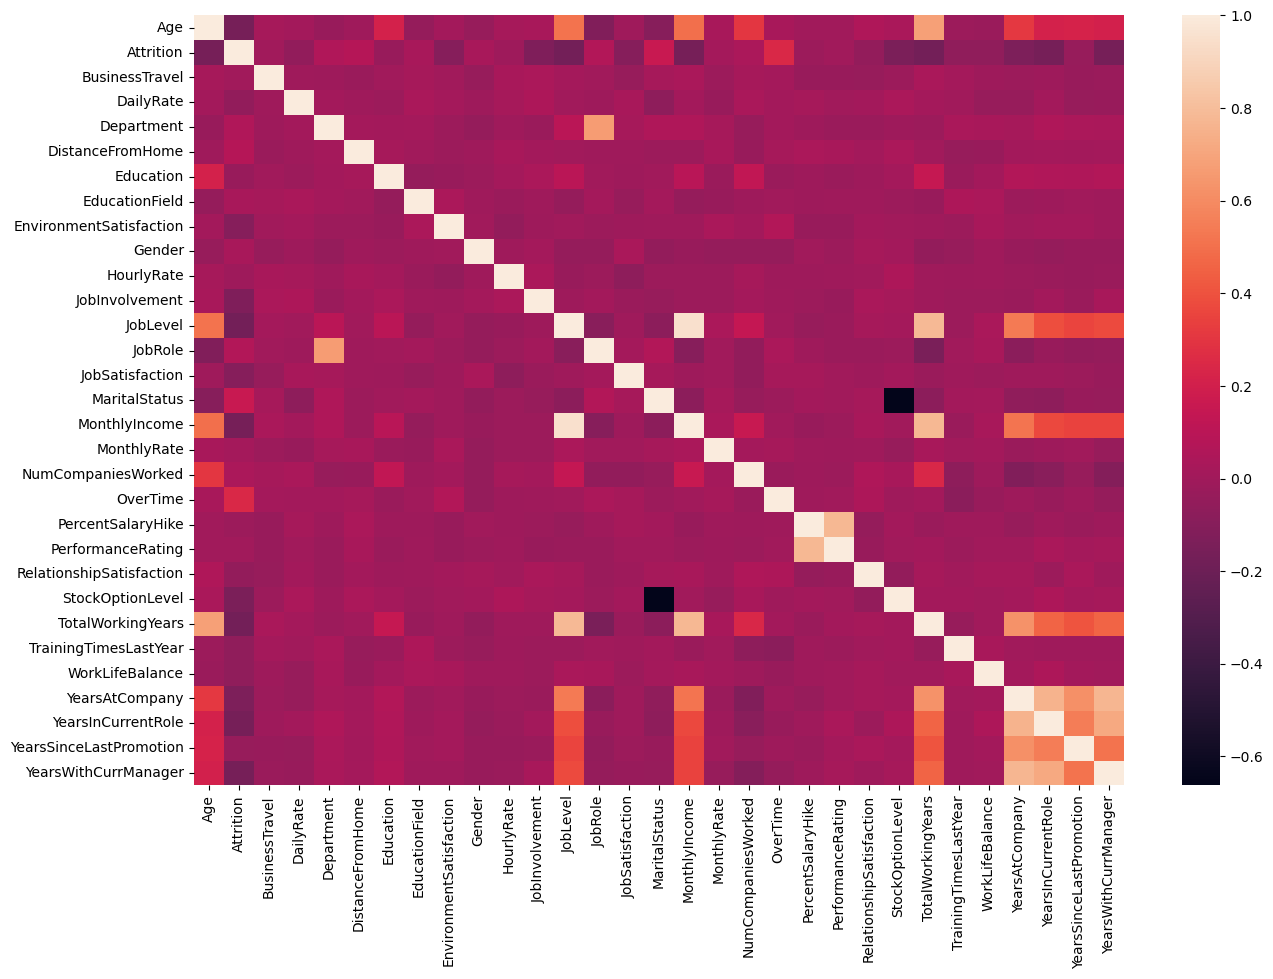

In [28]:
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(data_correlation,xticklabels=data_correlation.columns,yticklabels=data_correlation.columns)

# Finding patterns in data through visualization

C:\Users\ketak\AppData\Local\Temp\ipykernel_1596\1835053636.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\ketak\AppData\Local\Temp\ipykernel_1596\1835053636.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




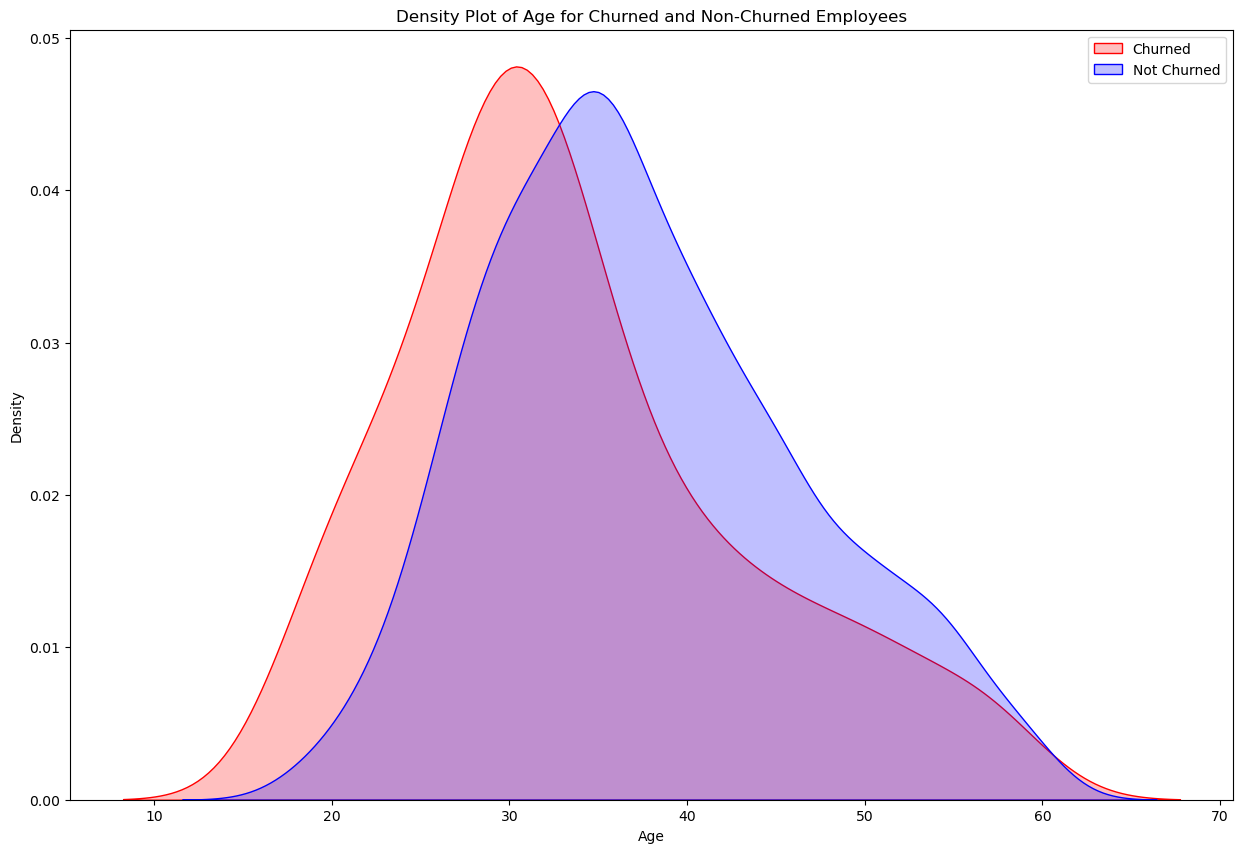

In [29]:
# Create density plots of age for churned and non-churned employees
sns.kdeplot(EmployeeAttrition_data[EmployeeAttrition_data['Attrition'] == 'Yes']['Age'], shade=True, color='red', label='Churned')
sns.kdeplot(EmployeeAttrition_data[EmployeeAttrition_data['Attrition'] == 'No']['Age'], shade=True, color='blue', label='Not Churned')

# Add a title and axis labels
plt.title('Density Plot of Age for Churned and Non-Churned Employees')
plt.xlabel('Age')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [30]:
#We are going to bin age (multiples of 10) to see which age group are likely to leave the company.
#Before that, let us take only employee who are likely to quit.
positive_attrition_df = data_encoded.loc[data_encoded['Attrition'] == 1]
negative_attrition_df = data_encoded.loc[data_encoded['Attrition'] == 0]

Business Travel vs Attrition

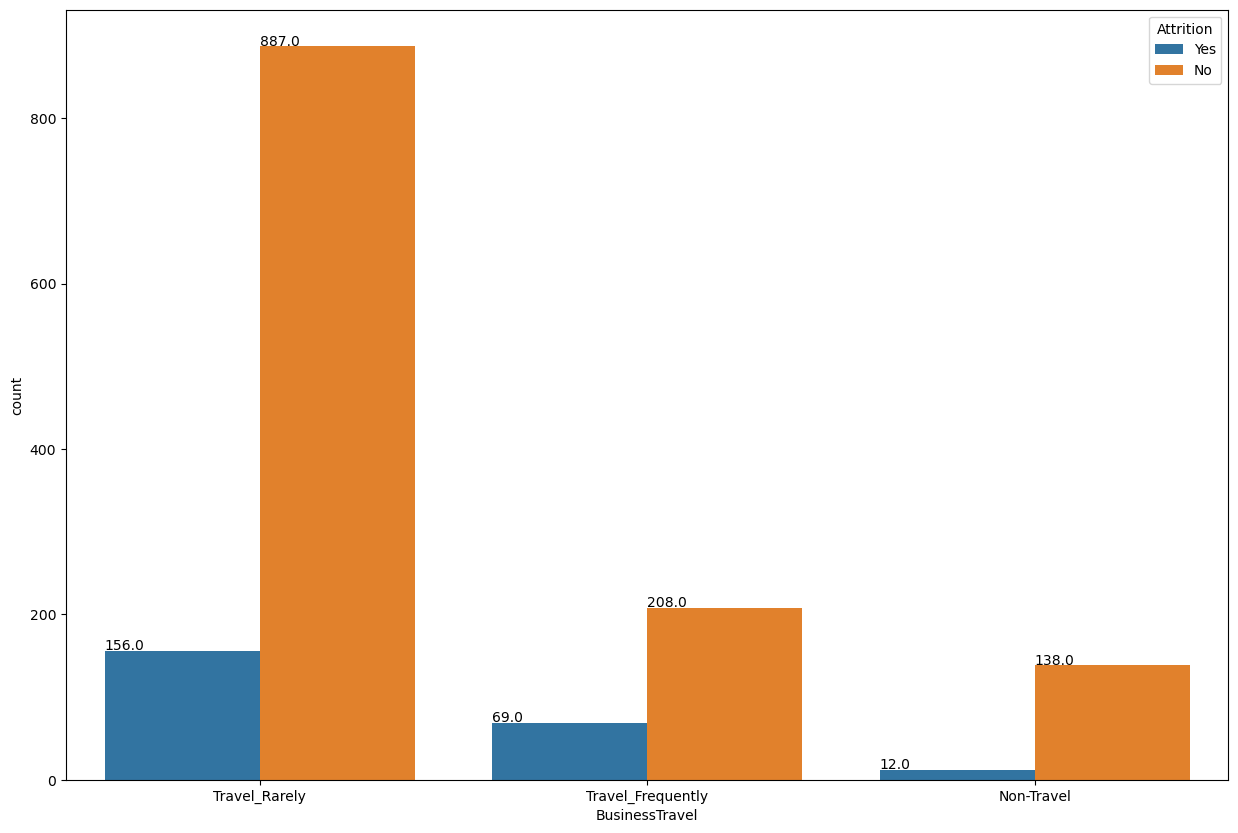

In [31]:
ax = sns.countplot(x="BusinessTravel", hue="Attrition", data=EmployeeAttrition_data)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

Department Vs Attrition

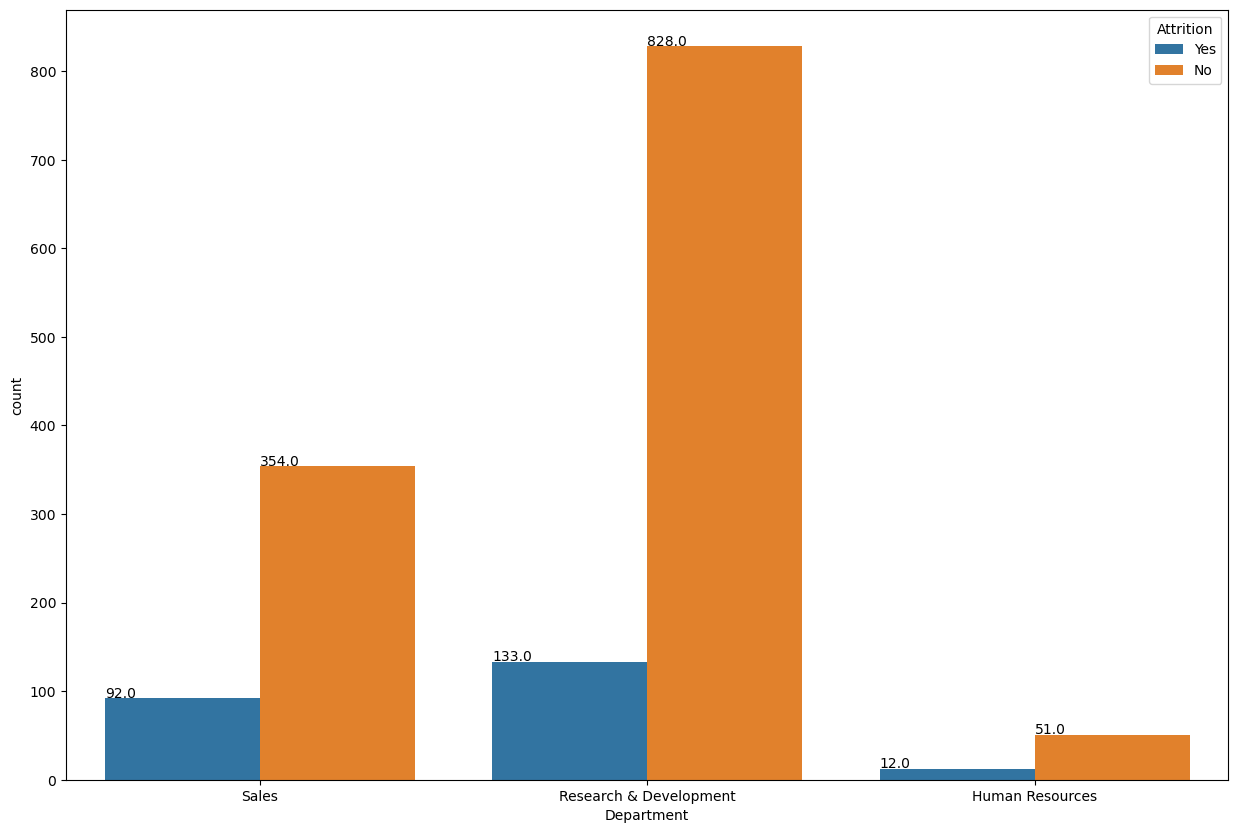

In [32]:
ax = sns.countplot(x="Department", hue="Attrition", data=EmployeeAttrition_data)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

Distance from home Vs Employee Attrition

(array([133.,  55.,  49.,   0.,   0.,   0.,   0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <BarContainer object of 7 artists>)

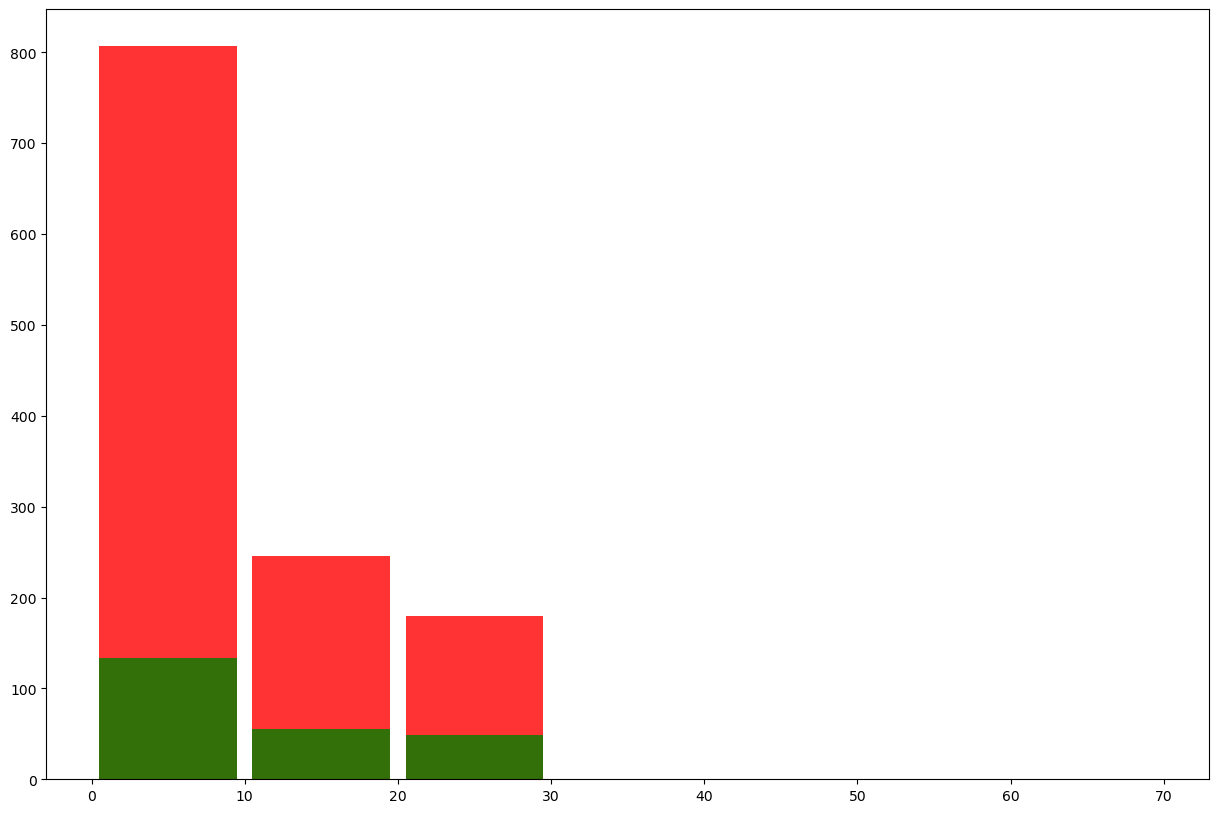

In [33]:
plt.hist(negative_attrition_df['DistanceFromHome'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='red')
plt.hist(positive_attrition_df['DistanceFromHome'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='green')

Findings ->
People who live closeby (0-10 miles) are likely to quit more based on the data

Education vs Attrition

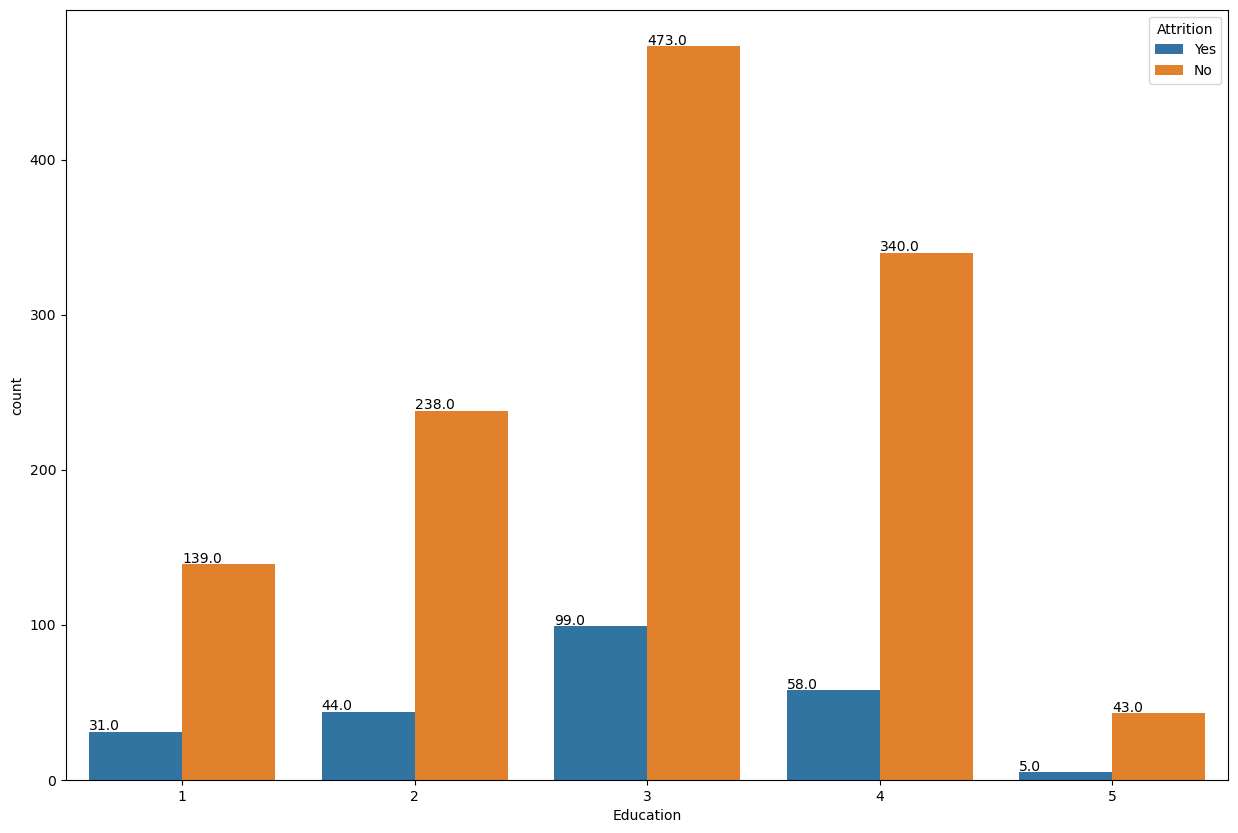

In [34]:
ax = sns.countplot(x="Education", hue="Attrition", data=EmployeeAttrition_data)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

Gender vs Attrition

In [35]:
df_age = EmployeeAttrition_data.copy(deep=True)
df_age.loc[df_age['Age'] <= 20, 'Age'] = 0
df_age.loc[(df_age['Age'] > 20) & (df_age['Age'] <= 30), 'Age'] = 1
df_age.loc[(df_age['Age'] > 30) & (df_age['Age'] <= 40), 'Age'] = 2
df_age.loc[(df_age['Age'] > 40) & (df_age['Age'] <= 50), 'Age'] = 3
df_age.loc[(df_age['Age'] > 50), 'Age'] = 4

In [36]:
df_age = pd.DataFrame({'count': df_age.groupby(["Gender", "Attrition"]).size()}).reset_index()
df_age['Gender-attrition'] = df_age['Gender'].astype(str) + "-" + df_age['Attrition'].astype(str).map(str)

In [37]:
df_age

,Gender,Attrition,count,Gender-attrition
0,Female,No,501,Female-No
1,Female,Yes,87,Female-Yes
2,Male,No,732,Male-No
3,Male,Yes,150,Male-Yes


In [38]:
output_notebook() 

# x and y axes
Gender_Attrition = df_age['Gender-attrition'].tolist()
count = df_age['count'].tolist()

print(count)

# Bokeh's mapping of column names and data lists
source = ColumnDataSource(data=dict(Gender_Attrition=Gender_Attrition, count=count, color=Viridis5))

plot_bar = figure(x_range=Gender_Attrition, plot_height=350, title="Counts")

# Render and show the vbar plot
plot_bar.vbar(x='Gender_Attrition', top='count', width=0.9, color='color', source=source)
show(plot_bar)

Loading BokehJS ...

[501, 87, 732, 150]


C:\Users\ketak\anaconda3\lib\site-packages\bokeh\models\sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('Gender_Attrition', 4), ('color', 5), ('count', 4)



Findings ->
From the above plot, we can infer that male employees are likely to leave organization as they amount to 63% compared to female who have 36 % attrition rate.

Job Role Vs Attrition

In [39]:
df_jrole = pd.DataFrame({'count': data_encoded.groupby(["JobRole", "Attrition"]).size()}).reset_index()

In [40]:
#Considering attrition case
df_jrole_1 = df_jrole.loc[df_jrole['Attrition'] == 1]

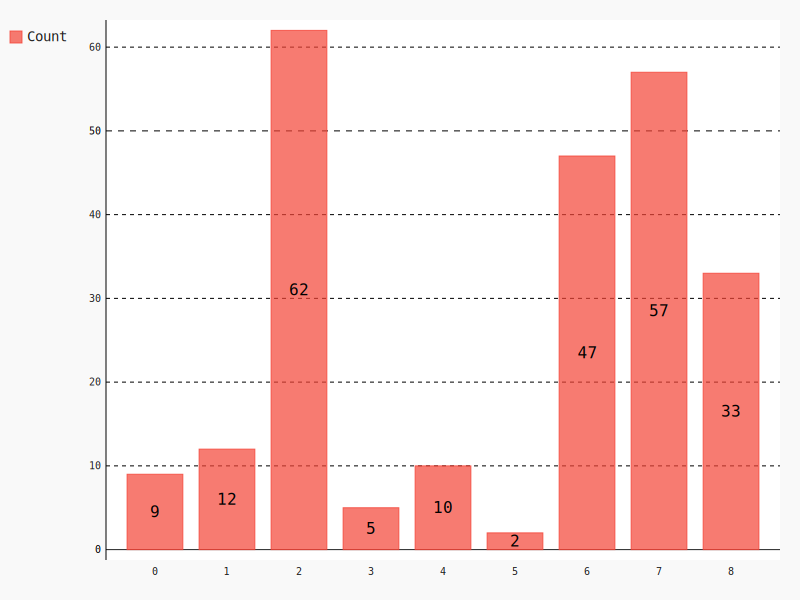

In [41]:
chart = pygal.Bar(print_values=True)
chart.x_labels = map(str, range(0,9))
chart.add('Count', df_jrole_1['count'])
#chart.render()
display(SVG(chart.render(disable_xml_declaration=True)))

Marital Status vs Attrition

In [42]:
#analyzing employees who has positive attrition
init_notebook_mode(connected=True)
cf.go_offline()
positive_attrition_df['MaritalStatus'].value_counts().iplot(kind='bar')

Monthly Income vs Attrition

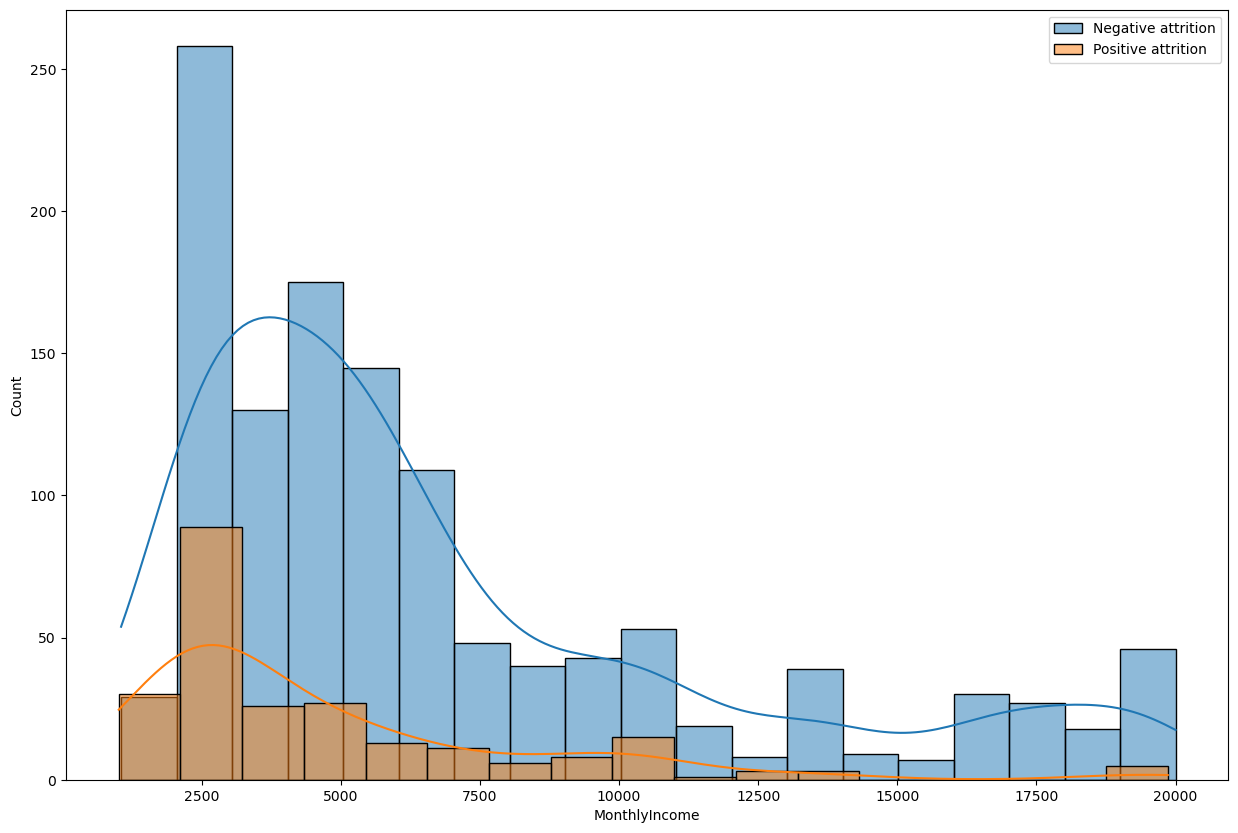

In [43]:
# Create a histogram using histplot
sns.histplot(negative_attrition_df['MonthlyIncome'], label='Negative attrition', kde=True)
sns.histplot(positive_attrition_df['MonthlyIncome'], label='Positive attrition', kde=True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

Inference -> Looks like people who are less likely to leave the company are the ones who are less paid.

Are employees leaving because they are poorly paid?

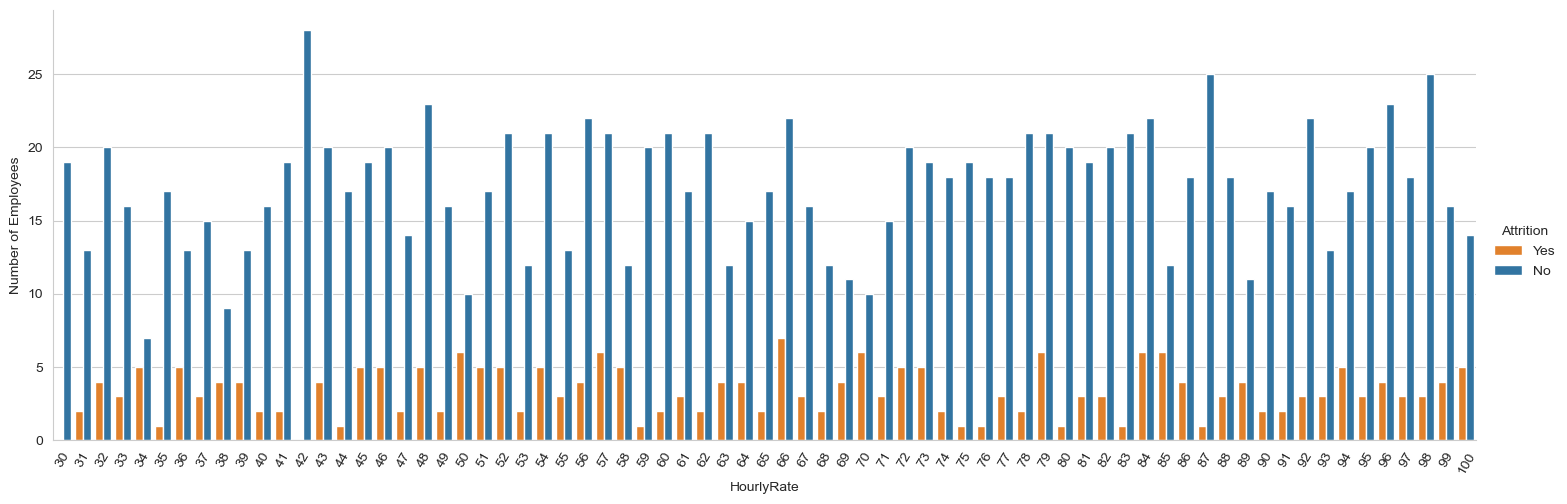

In [44]:
# calculate the average count and standard deviation of HourlyRate values
# set the style and create a categorical plot using catplot
sns.set_style('whitegrid')
sns.catplot(x='HourlyRate', data=EmployeeAttrition_data, aspect=3, kind='count', hue='Attrition', palette=['C1', 'C0']).set_ylabels('Number of Employees')
plt.xticks(rotation=60)
# show the plot
plt.show()

Overtime seems to be a key factor to attrition

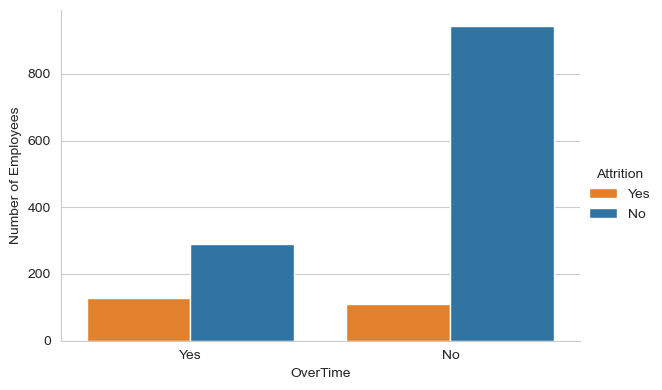

In [45]:
sns.set_style('whitegrid')

sns.catplot(x="OverTime", 
            data=EmployeeAttrition_data, 
            kind='count', 
            hue='Attrition', 
            palette=['C1', 'C0'], 
            height=4, 
            aspect=1.5)

sns.set(font_scale=1.2)

plt.xlabel('OverTime')
plt.ylabel('Number of Employees')

plt.show()

In [46]:
# employees have background in these EducationField 
EmployeeAttrition_data.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [47]:
# to analyse JobRole in each Department
for dpmt in EmployeeAttrition_data['Department'].unique():
    print('\n', dpmt, ':')
    print(EmployeeAttrition_data[EmployeeAttrition_data['Department']==dpmt]['JobRole'].value_counts())


 Sales :
Sales Executive         326
Sales Representative     83
Manager                  37
Name: JobRole, dtype: int64

 Research & Development :
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Research Director             80
Manager                       54
Name: JobRole, dtype: int64

 Human Resources :
Human Resources    52
Manager            11
Name: JobRole, dtype: int64


# Extracting label from input data

In [48]:
input_data = data_encoded.drop(['Attrition'], axis=1)

In [49]:
# Set the maximum number of columns to be displayed to 34
pd.options.display.max_columns = 34

input_data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [50]:
target_data = data_encoded[['Attrition']]

In [51]:
target_data.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [52]:
len(input_data.columns)

30

# Feature selection

It is the process of choosing the best features that can be used in the predictive modeling.

In [53]:
input_data.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [54]:
col_values = list(input_data.columns.values)
print(col_values)

['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [55]:
#gives top 15 features having maximum mutual information value
feature_scores = mutual_info_classif(input_data, target_data)
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:15]:
    print(fname, score)

OverTime 0.038857088887258806
Age 0.03374322809535646
MonthlyIncome 0.03249717826158327
Education 0.02754343156977046
YearsAtCompany 0.026103320710388678
MaritalStatus 0.024798417166028264
JobLevel 0.022616899252147604
TotalWorkingYears 0.022085249442538313
YearsInCurrentRole 0.019818432856622215
YearsSinceLastPromotion 0.01813822086034489
YearsWithCurrManager 0.017015585139794842
EducationField 0.016938604035686478
JobRole 0.01438981027687758
NumCompaniesWorked 0.009701185970157233
PercentSalaryHike 0.008400738736677571


C:\Users\ketak\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [56]:
data_encoded.shape

(1470, 31)

In [57]:
#column selection based on feature selection 
data_selected = data_encoded[['JobRole', 'YearsInCurrentRole', 'OverTime', 'YearsAtCompany', 
                      'MonthlyIncome', 'StockOptionLevel', 'EnvironmentSatisfaction', 'MaritalStatus', 'Age',
                      'PerformanceRating', 'TotalWorkingYears', 'JobLevel', 'DistanceFromHome', 'JobInvolvement','EducationField']]

In [58]:
data_selected.head()

,JobRole,YearsInCurrentRole,OverTime,YearsAtCompany,MonthlyIncome,StockOptionLevel,EnvironmentSatisfaction,MaritalStatus,Age,PerformanceRating,TotalWorkingYears,JobLevel,DistanceFromHome,JobInvolvement,EducationField
0,7,4,1,6,5993,0,2,2,41,3,8,2,1,3,1
1,6,7,0,10,5130,1,3,1,49,4,10,2,8,2,1
2,2,0,1,0,2090,0,4,2,37,3,7,1,2,2,4
3,6,7,1,8,2909,0,4,1,33,3,8,1,3,3,1
4,2,2,0,2,3468,1,1,1,27,3,6,1,2,3,3


In [59]:
data_selected.shape

(1470, 15)

In [60]:
X = data_selected

In [61]:
Y = data_encoded[['Attrition']]

In [62]:
X.shape

(1470, 15)

In [63]:
Y.shape

(1470, 1)

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [65]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1176, 15) (294, 15) (1176, 1) (294, 1)


In [66]:
# Convert to DataFrame
df_X = pd.DataFrame(X)

In [67]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X, Y)

C:\Users\ketak\AppData\Local\Temp\ipykernel_1596\997612037.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



ExtraTreesRegressor()

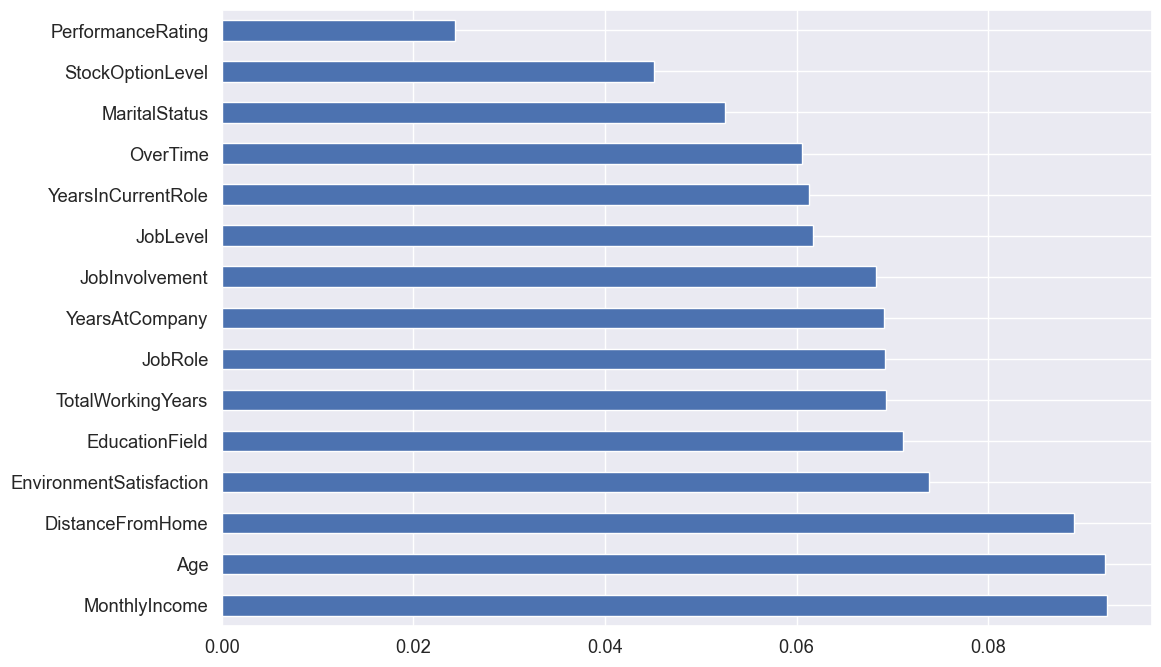

In [68]:
#plot a graph of feature importances for better visualization
plt.figure(figsize = (12,8))

feat_importances = pd.Series(selection.feature_importances_, index=df_X.columns)

feat_importances.nlargest(20).plot(kind='barh')

plt.show()

# LogisticRegression

# Apply LogisticRegression using Sklearn library

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
model = LogisticRegression(max_iter=1000)

In [71]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

C:\Users\ketak\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(max_iter=1000)

In [72]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [74]:
from sklearn.metrics import precision_score,recall_score,f1_score,log_loss

print('Accuracy on Training data : ', training_data_accuracy)
print("Precision scores  on Training Data :",precision_score(Y_train, X_train_prediction))
print("Recall scores  on Training Data:",recall_score(Y_train, X_train_prediction))
print("F1 scores on Training Data:",f1_score(Y_train, X_train_prediction))
print('Classification report on Training data : \n',classification_report(Y_train, X_train_prediction))
print('Confusion matrix on Training data : \n',confusion_matrix(Y_train, X_train_prediction))
print('Log loss on Training Data:', log_loss(Y_train, X_train_prediction))
print("\n")
print('Accuracy score on Test Data : ', test_data_accuracy)
print("Precision scores  on Test Data :",precision_score(Y_test, X_test_prediction))
print("Recall scores  on Test Data:",recall_score(Y_test, X_test_prediction))
print("F1 scores on Test Data:",f1_score(Y_test, X_test_prediction))
print('Classification report on Test Data : \n',classification_report(Y_test, X_test_prediction))
print('Confusion matrix score on Test Data : \n',confusion_matrix(Y_test, X_test_prediction))
print('Log loss on Test Data:', log_loss(Y_test, X_test_prediction))

Accuracy on Training data :  0.8571428571428571
Precision scores  on Training Data : 0.6704545454545454
Recall scores  on Training Data: 0.29797979797979796
F1 scores on Training Data: 0.41258741258741255
Classification report on Training data : 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       978
           1       0.67      0.30      0.41       198

    accuracy                           0.86      1176
   macro avg       0.77      0.63      0.67      1176
weighted avg       0.84      0.86      0.83      1176

Confusion matrix on Training data : 
 [[949  29]
 [139  59]]
Log loss on Training Data: 4.9341306315225095


Accuracy score on Test Data :  0.8775510204081632
Precision scores  on Test Data : 0.6
Recall scores  on Test Data: 0.23076923076923078
F1 scores on Test Data: 0.33333333333333337
Classification report on Test Data : 
               precision    recall  f1-score   support

           0       0.89      0.98      0.9

In [75]:
from sklearn.metrics import roc_curve,auc

# Predict the probabilities of attrition for the test data
y_prob = model.predict_proba(X_test)[:, 1]

# Predict the probabilities of attrition for the test data
y_prob_train = model.predict_proba(X_train)[:, 1]

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve
fpr_lg1, tpr_lg1, thresholds_lg1 = roc_curve(Y_test, y_prob)
roc_auc_lg1 = auc(fpr_lg1, tpr_lg1)

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve
fpr_train_lg1, tpr_train_lg1, thresholds_train_lg1 = roc_curve(Y_train, y_prob_train)
roc_auc_train_lg1 = auc(fpr_train_lg1, tpr_train_lg1)

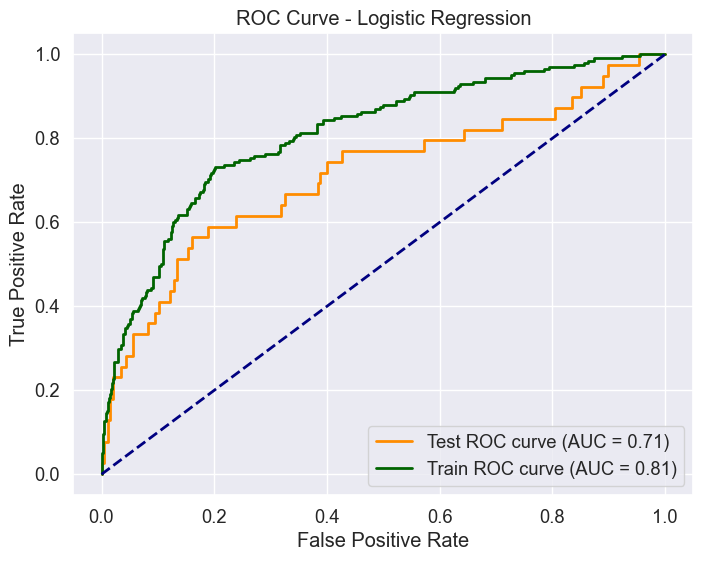

AUC score on testing data: 0.7121166415284061
AUC score on training data: 0.8113496932515336


In [151]:
# Plot the ROC curves for train and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_lg1, tpr_lg1, color='darkorange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_lg1:.2f})')
plt.plot(fpr_train_lg1, tpr_train_lg1, color='darkgreen', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train_lg1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()
print("AUC score on testing data:",roc_auc_lg1)
print("AUC score on training data:",roc_auc_train_lg1)

In [77]:
from prettytable import PrettyTable

train_accuracy = 0.85
train_precision = 0.67
train_recall = 0.29
train_f1score = 0.41
train_auc = 0.81
train_confusion_matrix = [[949,  29],[139,  59]]
train_classification_report = """
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       978
           1       0.67      0.30      0.41       198

    accuracy                           0.86      1176
   macro avg       0.77      0.63      0.67      1176
weighted avg       0.84      0.86      0.83      1176
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Train Metrics for Logistic Regression using SKlearn library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Train Accuracy", train_accuracy])
train_table.add_row(["Train Precision", train_precision])
train_table.add_row(["Train Recall", train_recall])
train_table.add_row(["Train F1-Score", train_f1score])
train_table.add_row(["Train AUC Score", train_auc])
train_table.add_row(["Train Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Train Classification Report", train_classification_report])

# Print the table
print(train_table)

+-------------------------------------------------------------------------------------+
|             Train Metrics for Logistic Regression using SKlearn library             |
+-----------------------------+-------------------------------------------------------+
|            Metric           |                         Value                         |
+-----------------------------+-------------------------------------------------------+
|        Train Accuracy       |                         0.857                         |
|       Train Precision       |                          0.67                         |
|         Train Recall        |                         0.297                         |
|        Train F1-Score       |                         0.412                         |
|       Train AUC Score       |                         0.811                         |
|    Train Confusion Matrix   |                 [[949, 29], [139, 59]]                |
| Train Classification Report | 

In [134]:
from prettytable import PrettyTable

train_accuracy =   0.87
train_precision = 0.6
train_recall =  0.23
train_f1score =  0.33
train_auc = 0.71
train_confusion_matrix = [[249, 6],[ 30,   9]]
train_classification_report = """
                precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.60      0.23      0.33        39

    accuracy                           0.88       294
   macro avg       0.75      0.60      0.63       294
weighted avg       0.85      0.88      0.85       294
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Test Metrics for Logistic Regression using SKlearn library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Test Accuracy", train_accuracy])
train_table.add_row(["Test Precision", train_precision])
train_table.add_row(["Test Recall", train_recall])
train_table.add_row(["Test F1-Score", train_f1score])
train_table.add_row(["Test AUC Score", train_auc])
train_table.add_row(["Test Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Test Classification Report", train_classification_report])

# Print the table
print(train_table)

+--------------------------------------------------------------------------------------+
|              Test Metrics for Logistic Regression using SKlearn library              |
+----------------------------+---------------------------------------------------------+
|           Metric           |                          Value                          |
+----------------------------+---------------------------------------------------------+
|       Test Accuracy        |                           0.87                          |
|       Test Precision       |                           0.6                           |
|        Test Recall         |                           0.23                          |
|       Test F1-Score        |                           0.33                          |
|       Test AUC Score       |                           0.71                          |
|   Test Confusion Matrix    |                   [[249, 6], [30, 9]]                   |
| Test Classification

# Apply LogisticRegression using statsmodels:

In [79]:
import statsmodels.api as sm

# fit the logistic regression model on train dataset using statsmodels
logit_model=sm.Logit(Y_train, X_train)
result=logit_model.fit(maxiter=1000)

Optimization terminated successfully.
         Current function value: 0.353481
         Iterations 7


In [80]:
# predict target variable for both train and test datasets
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)

In [81]:
# convert probabilities to binary predictions
y_train_pred[y_train_pred > 0.5] = 1
y_train_pred[y_train_pred <= 0.5] = 0
y_test_pred[y_test_pred > 0.5] = 1
y_test_pred[y_test_pred <= 0.5] = 0

# calculate accuracy for train and test datasets
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

In [82]:
train_report = classification_report(Y_train, y_train_pred)

train_matrix = confusion_matrix(Y_train, y_train_pred)
test_matrix = confusion_matrix(Y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
# Calculate precision scores
train_precision = precision_score(Y_train, y_train_pred)
print("Precision scores on Training Data :",train_precision)

# Calculate recall scores
train_recall = recall_score(Y_train, y_train_pred)
print("Recall scores on Training Data:",train_recall)

# Calculate F1 scores
train_f1 = f1_score(Y_train, y_train_pred)
print("F1 scores on Training Data:",train_f1)
print("Training Classification Report:\n", train_report)
print("Training Confusion Matrix:\n", train_matrix)
print('Test Log loss :', log_loss(Y_test, y_test_pred))

print('\n')
print("Test Accuracy:", test_accuracy)
test_report = classification_report(Y_test, y_test_pred)
# Calculate precision scores
train_precision = precision_score(Y_test, y_test_pred)
print("Precision scores  on Test Data :",train_precision)

# Calculate recall scores
train_recall = recall_score(Y_test, y_test_pred)
print("Recall scores  on Test Data:",train_recall)

# Calculate F1 scores
train_f1 = f1_score(Y_test, y_test_pred)
print("F1 scores on Test Data:",train_f1)
print("Testing Classification Report:\n", test_report)
print("Testing Confusion Matrix:\n", test_matrix)
print('Test Log loss :', log_loss(Y_test, y_test_pred))

Train Accuracy: 0.8537414965986394
Precision scores on Training Data : 0.6547619047619048
Recall scores on Training Data: 0.2777777777777778
F1 scores on Training Data: 0.3900709219858156
Training Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       978
           1       0.65      0.28      0.39       198

    accuracy                           0.85      1176
   macro avg       0.76      0.62      0.65      1176
weighted avg       0.83      0.85      0.83      1176

Training Confusion Matrix:
 [[949  29]
 [143  55]]
Test Log loss : 4.111769973508825


Test Accuracy: 0.8809523809523809
Precision scores  on Test Data : 0.6666666666666666
Recall scores  on Test Data: 0.20512820512820512
F1 scores on Test Data: 0.31372549019607837
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.67      0.21      0.31  

Optimization terminated successfully.
         Current function value: 0.353424
         Iterations 7


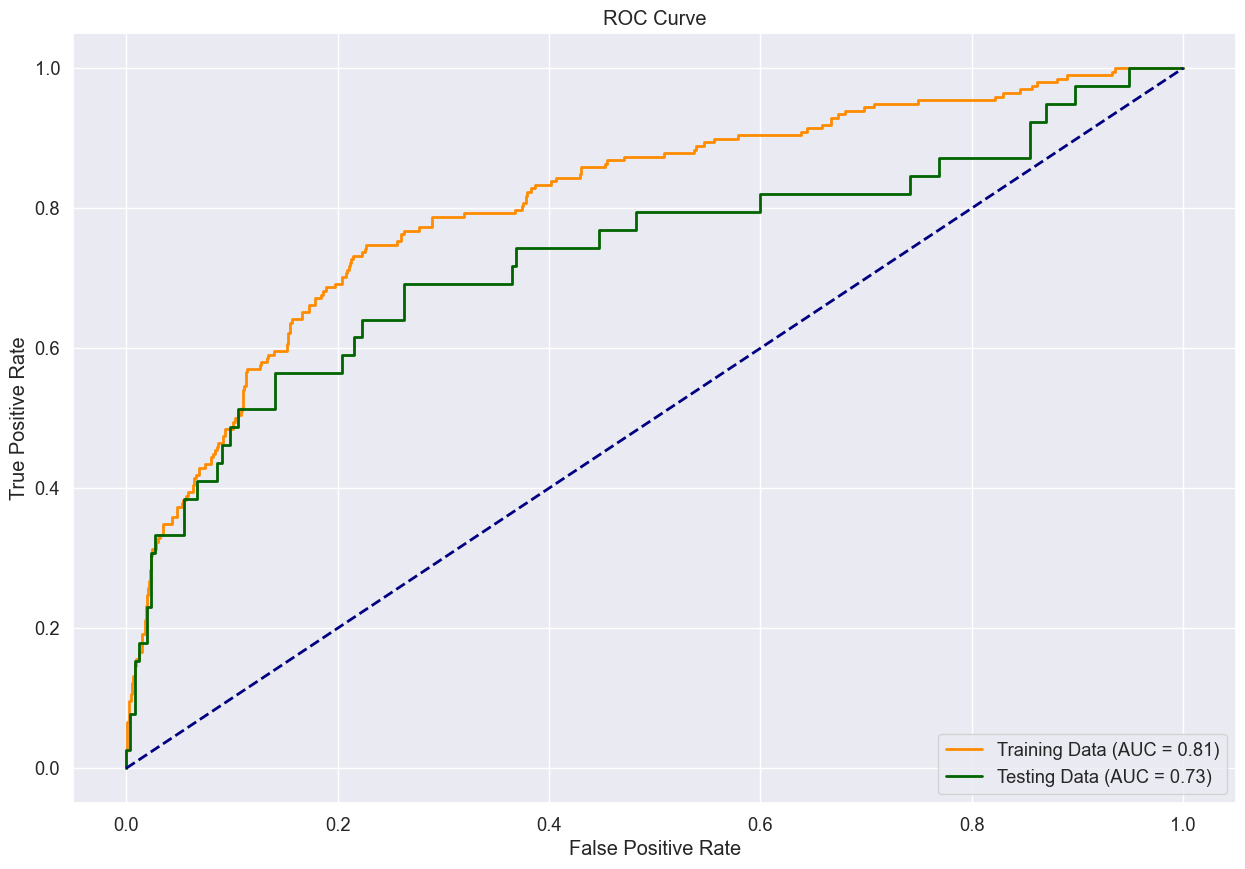

AUC score on testing data: 0.8093718369791989
AUC score on training data: 0.7336349924585219


In [83]:
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc

# Fit the logistic regression model
X = sm.add_constant(X)
model = sm.Logit(Y, X).fit()

# Calculate the predicted probabilities for the training and testing data
y_train_prob = model.fittedvalues[X_train.index]
y_test_prob = model.fittedvalues[X_test.index]

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve for training data
fpr_train_lgr2, tpr_train_lgr2, thresholds_train_lgr2 = roc_curve(Y_train, y_train_prob)
roc_auc_train_lgr2 = auc(fpr_train_lgr2, tpr_train_lgr2)

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve for testing data
fpr_test_lgr2, tpr_test_lgr2, thresholds_test_lgr2 = roc_curve(Y_test, y_test_prob)
roc_auc_test_lgr2 = auc(fpr_test_lgr2, tpr_test_lgr2)

# Plot the ROC curves
plt.plot(fpr_train_lgr2, tpr_train_lgr2, color='darkorange', lw=2, label='Training Data (AUC = %0.2f)' % roc_auc_train_lgr2)
plt.plot(fpr_test_lgr2, tpr_test_lgr2, color='darkgreen', lw=2, label='Testing Data (AUC = %0.2f)' % roc_auc_test_lgr2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print("AUC score on testing data:",roc_auc_train_lgr2)
print("AUC score on training data:",roc_auc_test_lgr2)

In [135]:
from prettytable import PrettyTable

train_accuracy = 0.85
train_precision = 0.65
train_recall = 0.27
train_f1score = 0.39
train_auc = 0.73
train_confusion_matrix = [[949 , 29],[143,  55]]
train_classification_report = """
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       978
           1       0.65      0.28      0.39       198

    accuracy                           0.85      1176
   macro avg       0.76      0.62      0.65      1176
weighted avg       0.83      0.85      0.83      1176
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Train Metrics for Logistic Regression using Statsmodel library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Train Accuracy", train_accuracy])
train_table.add_row(["Train Precision", train_precision])
train_table.add_row(["Train Recall", train_recall])
train_table.add_row(["Train F1-Score", train_f1score])
train_table.add_row(["Train AUC Score", train_auc])
train_table.add_row(["Train Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Train Classification Report", train_classification_report])

# Print the table
print(train_table)

+-------------------------------------------------------------------------------------+
|            Train Metrics for Logistic Regression using Statsmodel library           |
+-----------------------------+-------------------------------------------------------+
|            Metric           |                         Value                         |
+-----------------------------+-------------------------------------------------------+
|        Train Accuracy       |                          0.85                         |
|       Train Precision       |                          0.65                         |
|         Train Recall        |                          0.27                         |
|        Train F1-Score       |                          0.39                         |
|       Train AUC Score       |                          0.73                         |
|    Train Confusion Matrix   |                 [[949, 29], [143, 55]]                |
| Train Classification Report | 

In [136]:
from prettytable import PrettyTable

train_accuracy =   0.88
train_precision = 0.66
train_recall =  0.20
train_f1score =  0.31
train_auc = 0.80
train_confusion_matrix = [[251,   4],[ 31 ,  8]]
train_classification_report = """
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.67      0.21      0.31        39

    accuracy                           0.88       294
   macro avg       0.78      0.59      0.62       294
weighted avg       0.86      0.88      0.85       294
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Test Metrics for Logistic Regression using Statsmodel library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Test Accuracy", train_accuracy])
train_table.add_row(["Test Precision", train_precision])
train_table.add_row(["Test Recall", train_recall])
train_table.add_row(["Test F1-Score", train_f1score])
train_table.add_row(["Test AUC Score", train_auc])
train_table.add_row(["Test Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Test Classification Report", train_classification_report])

# Print the table
print(train_table)

+-------------------------------------------------------------------------------------+
|            Test Metrics for Logistic Regression using Statsmodel library            |
+----------------------------+--------------------------------------------------------+
|           Metric           |                         Value                          |
+----------------------------+--------------------------------------------------------+
|       Test Accuracy        |                          0.88                          |
|       Test Precision       |                          0.66                          |
|        Test Recall         |                          0.2                           |
|       Test F1-Score        |                          0.31                          |
|       Test AUC Score       |                          0.8                           |
|   Test Confusion Matrix    |                  [[251, 4], [31, 8]]                   |
| Test Classification Report |  

# DecisionTreeClassifier

# Apply DecisionTreeClassifier using sklearn

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [87]:
# Train the model
dtc = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

In [88]:
# Make predictions on the train and test sets
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

In [89]:
# Calculate accuracy scores
train_accuracy = accuracy_score(Y_train, y_train_pred)
print("Train Accuracy:",train_accuracy)

# Calculate confusion matrices
train_cm = confusion_matrix(Y_train, y_train_pred)
print("Train confusion matrice:\n",train_cm)

# Calculate precision scores
train_precision = precision_score(Y_train, y_train_pred)
print("Train precision scores:",train_precision)

# Calculate recall scores
train_recall = recall_score(Y_train, y_train_pred)
print("Train recall scores:",train_recall)

# Calculate F1 scores
train_f1 = f1_score(Y_train, y_train_pred)
print("Train F1 scores:",train_f1)

# Calculate classification report
train_report = classification_report(Y_train, y_train_pred)
print("Training Classification Report:\n", train_report)
print('Training Log loss :', log_loss(Y_train, y_train_pred))

Train Accuracy: 0.8579931972789115
Train confusion matrice:
 [[962  16]
 [151  47]]
Train precision scores: 0.746031746031746
Train recall scores: 0.23737373737373738
Train F1 scores: 0.36015325670498083
Training Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       978
           1       0.75      0.24      0.36       198

    accuracy                           0.86      1176
   macro avg       0.81      0.61      0.64      1176
weighted avg       0.84      0.86      0.83      1176

Training Log loss : 4.904752084616469


In [90]:
# Calculate accuracy scores
test_accuracy = accuracy_score(Y_test, y_test_pred)
print("Test Accuracy:",test_accuracy)

# Calculate confusion matrices
test_cm = confusion_matrix(Y_test, y_test_pred)
print("Test confusion matrices:\n",test_cm)

# Calculate precision scores
test_precision = precision_score(Y_test, y_test_pred)
print("Test precision scores:",test_precision)

# Calculate recall scores
test_recall = recall_score(Y_test, y_test_pred)
print("Test recall scores:",test_recall)

# Calculate F1 scores
test_f1 = f1_score(Y_test, y_test_pred)
print("Test F1 scores:",test_f1)

# Calculate classification report
test_report = classification_report(Y_test, y_test_pred)
print("Test Classification Report:\n", test_report)
print('Test Log loss :', log_loss(Y_test, y_test_pred))

Test Accuracy: 0.8537414965986394
Test confusion matrices:
 [[250   5]
 [ 38   1]]
Test precision scores: 0.16666666666666666
Test recall scores: 0.02564102564102564
Test F1 scores: 0.044444444444444446
Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       255
           1       0.17      0.03      0.04        39

    accuracy                           0.85       294
   macro avg       0.52      0.50      0.48       294
weighted avg       0.78      0.85      0.80       294

Test Log loss : 5.051603343429627


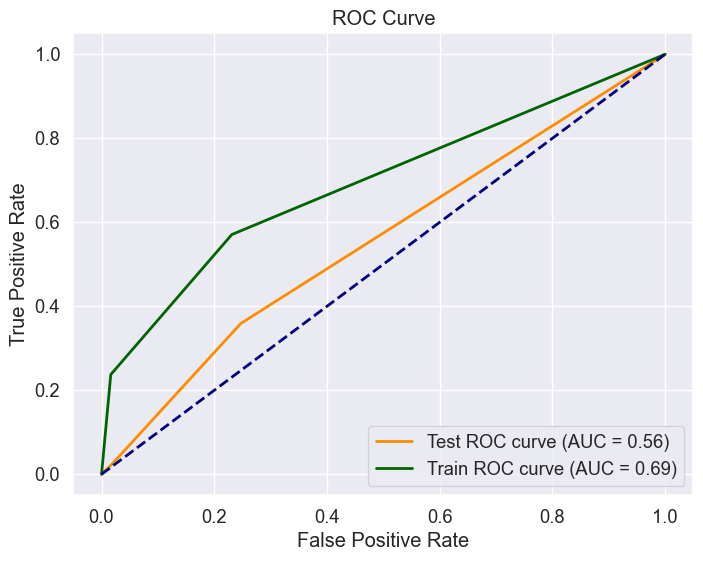

AUC score on testing data: 0.5556058320764203
AUC score on training data: 0.6925698704839809


In [91]:
from sklearn.metrics import roc_curve,auc

# Predict the probabilities of attrition for the test data
y_prob_test = dtc.predict_proba(X_test)[:, 1]

# Predict the probabilities of attrition for the test data
y_prob_train = dtc.predict_proba(X_train)[:, 1]

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve
fpr_test_dt1, tpr_test_dt1, thresholds_dt1 = roc_curve(Y_test, y_prob_test)
roc_auc_dt1 = auc(fpr_test_dt1, tpr_test_dt1)

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve
fpr_train_dt1, tpr_train_dt1, thresholds_train_dt1 = roc_curve(Y_train, y_prob_train)
roc_auc_train_dt1 = auc(fpr_train_dt1, tpr_train_dt1)

# Plot the ROC curves for train and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_dt1, tpr_test_dt1, color='darkorange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_dt1:.2f})')
plt.plot(fpr_train_dt1, tpr_train_dt1, color='darkgreen', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train_dt1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print("AUC score on testing data:",roc_auc_dt1)
print("AUC score on training data:",roc_auc_train_dt1)

In [92]:
from prettytable import PrettyTable

train_accuracy = 0.857
train_precision = 0.746
train_recall = 0.237
train_f1score = 0.360
train_auc =  0.69
train_confusion_matrix = [[962,  16],[151,  47]]
train_classification_report = """
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       978
           1       0.75      0.24      0.36       198

    accuracy                           0.86      1176
   macro avg       0.81      0.61      0.64      1176
weighted avg       0.84      0.86      0.83      1176
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Train Metrics for DecisionTreeClassifier using Sklearn library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Train Accuracy", train_accuracy])
train_table.add_row(["Train Precision", train_precision])
train_table.add_row(["Train Recall", train_recall])
train_table.add_row(["Train F1-Score", train_f1score])
train_table.add_row(["Train AUC Score", train_auc])
train_table.add_row(["Train Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Train Classification Report", train_classification_report])

# Print the table
print(train_table)

+--------------------------------------------------------------------------------------+
|            Train Metrics for DecisionTreeClassifier using Sklearn library            |
+-----------------------------+--------------------------------------------------------+
|            Metric           |                         Value                          |
+-----------------------------+--------------------------------------------------------+
|        Train Accuracy       |                         0.857                          |
|       Train Precision       |                         0.746                          |
|         Train Recall        |                         0.237                          |
|        Train F1-Score       |                          0.36                          |
|       Train AUC Score       |                         0.692                          |
|    Train Confusion Matrix   |                 [[962, 16], [151, 47]]                 |
| Train Classificatio

In [137]:
from prettytable import PrettyTable

train_accuracy =   0.85
train_precision = 0.16
train_recall =  0.02
train_f1score =  0.04
train_auc = 0.55
train_confusion_matrix = [[250,  5],[ 38,   1]]
train_classification_report = """
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       255
           1       0.17      0.03      0.04        39

    accuracy                           0.85       294
   macro avg       0.52      0.50      0.48       294
weighted avg       0.78      0.85      0.80       294
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Test Metrics for DecisionTreeClassifier using Sklearn library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Test Accuracy", train_accuracy])
train_table.add_row(["Test Precision", train_precision])
train_table.add_row(["Test Recall", train_recall])
train_table.add_row(["Test F1-Score", train_f1score])
train_table.add_row(["Test AUC Score", train_auc])
train_table.add_row(["Test Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Test Classification Report", train_classification_report])

# Print the table
print(train_table)

+-------------------------------------------------------------------------------------+
|            Test Metrics for DecisionTreeClassifier using Sklearn library            |
+----------------------------+--------------------------------------------------------+
|           Metric           |                         Value                          |
+----------------------------+--------------------------------------------------------+
|       Test Accuracy        |                          0.85                          |
|       Test Precision       |                          0.16                          |
|        Test Recall         |                          0.02                          |
|       Test F1-Score        |                          0.04                          |
|       Test AUC Score       |                          0.55                          |
|   Test Confusion Matrix    |                  [[250, 5], [38, 1]]                   |
| Test Classification Report |  

# Apply DecisionTreeClassifier using XGBoost

In [94]:
import xgboost as xgb

# Build the XGBoost Decision Tree model
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)
params = {'max_depth': 3, 'eta': 0.1, 'objective': 'binary:logistic'}
xgb_model = xgb.train(params, dtrain)

# Make predictions
y_pred = xgb_model.predict(dtest)
y_pred = [round(value) for value in y_pred]

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)

In [95]:
# Define the model with early stopping
model = xgb.XGBClassifier(n_estimators=10000, random_state=42, eval_metric='logloss', early_stopping_rounds=10)

# Train the model
model.fit(X_train, Y_train, eval_set=[(X_test, Y_test)], verbose=False)

# Make predictions on the train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(Y_train, y_train_pred)
print("Train accuracy score:",train_accuracy)

# Calculate confusion matrices
train_cm = confusion_matrix(Y_train, y_train_pred)
print("Train confusion matrice:\n",train_cm)

# Calculate precision scores
train_precision = precision_score(Y_train, y_train_pred)
print("Train precision scores:",train_precision)

# Calculate recall scores
train_recall = recall_score(Y_train, y_train_pred)
print("Train recall scores:",train_recall)

# Calculate F1 scores
train_f1 = f1_score(Y_train, y_train_pred)
print("Train F1 scores:",train_f1)

# Calculate classification report
train_report = classification_report(Y_train, y_train_pred)
print("Training Classification Report:\n", train_report)
print('Training Log loss :', log_loss(Y_train, y_train_pred))

Train accuracy score: 0.9481292517006803
Train confusion matrice:
 [[978   0]
 [ 61 137]]
Train precision scores: 1.0
Train recall scores: 0.6919191919191919
Train F1 scores: 0.817910447761194
Training Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       978
           1       1.00      0.69      0.82       198

    accuracy                           0.95      1176
   macro avg       0.97      0.85      0.89      1176
weighted avg       0.95      0.95      0.94      1176

Training Log loss : 1.7915521769468983


In [96]:
# Calculate accuracy scores
test_accuracy = accuracy_score(Y_test, y_test_pred)
print("Test accuracy scores:", test_accuracy)

# Calculate confusion matrices
test_cm = confusion_matrix(Y_test, y_test_pred)
print("Test confusion matrices:\n", test_cm)

# Calculate precision scores
test_precision = precision_score(Y_test, y_test_pred)
print("Test precision scores:", test_precision)

# Calculate recall scores
test_recall = recall_score(Y_test, y_test_pred)
print("Test recall scores:", test_recall)

# Calculate F1 scores
test_f1 = f1_score(Y_test, y_test_pred)
print("Test F1 scores:", test_f1)

# Calculate classification report
test_report = classification_report(Y_test, y_test_pred)
print("Test Classification Report:\n", test_report)
print('Test Log loss :', log_loss(Y_test, y_test_pred))

Test accuracy scores: 0.8469387755102041
Test confusion matrices:
 [[242  13]
 [ 32   7]]
Test precision scores: 0.35
Test recall scores: 0.1794871794871795
Test F1 scores: 0.23728813559322035
Test Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       255
           1       0.35      0.18      0.24        39

    accuracy                           0.85       294
   macro avg       0.62      0.56      0.58       294
weighted avg       0.81      0.85      0.83       294

Test Log loss : 5.286582763733243


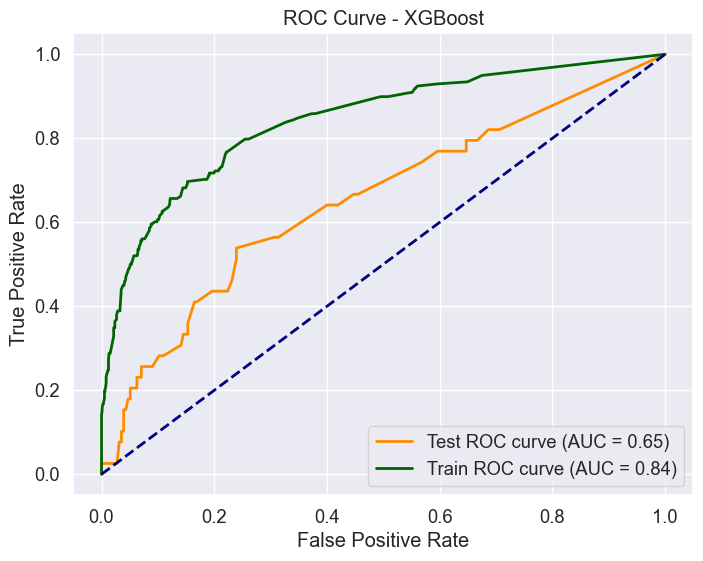

AUC score on testing data: 0.8425951746503894
AUC score on training data: 0.6526897938662645


In [97]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# Predict the scores of attrition for the test data
y_score_test = xgb_model.predict(dtest, output_margin=True)

# Predict the scores of attrition for the train data
y_score_train = xgb_model.predict(dtrain, output_margin=True)

# Convert the scores to probabilities
y_prob_test = 1 / (1 + np.exp(-y_score_test))
y_prob_train = 1 / (1 + np.exp(-y_score_train))

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve
fpr_test_dt2, tpr_test_dt2, thresholds_dt2 = roc_curve(Y_test, y_prob_test)
roc_auc_test_dt2 = auc(fpr_test_dt2, tpr_test_dt2)

fpr_train_dt2, tpr_train_dt2, thresholds_train_dt2 = roc_curve(Y_train, y_prob_train)
roc_auc_train_dt2 = auc(fpr_train_dt2, tpr_train_dt2)

# Plot the ROC curves for train and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_dt2, tpr_test_dt2, color='darkorange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test_dt2:.2f})')
plt.plot(fpr_train_dt2, tpr_train_dt2, color='darkgreen', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train_dt2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()
print("AUC score on testing data:",roc_auc_train_dt2)
print("AUC score on training data:",roc_auc_test_dt2)

In [98]:
from prettytable import PrettyTable

train_accuracy = 0.948
train_precision = 1.0
train_recall = 0.691
train_f1score = 0.817
train_auc = 0.652
train_confusion_matrix =  [[978,   0],[ 61,137]]
train_classification_report = """
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       978
           1       1.00      0.69      0.82       198

    accuracy                           0.95      1176
   macro avg       0.97      0.85      0.89      1176
weighted avg       0.95      0.95      0.94      1176
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Train Metrics for DecisionTreeClassifier using XGBoost library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Train Accuracy", train_accuracy])
train_table.add_row(["Train Precision", train_precision])
train_table.add_row(["Train Recall", train_recall])
train_table.add_row(["Train F1-Score", train_f1score])
train_table.add_row(["Train AUC Score", train_auc])
train_table.add_row(["Train Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Train Classification Report", train_classification_report])

# Print the table
print(train_table)

+--------------------------------------------------------------------------------------+
|            Train Metrics for DecisionTreeClassifier using XGBoost library            |
+-----------------------------+--------------------------------------------------------+
|            Metric           |                         Value                          |
+-----------------------------+--------------------------------------------------------+
|        Train Accuracy       |                         0.948                          |
|       Train Precision       |                          1.0                           |
|         Train Recall        |                         0.691                          |
|        Train F1-Score       |                         0.817                          |
|       Train AUC Score       |                         0.652                          |
|    Train Confusion Matrix   |                 [[978, 0], [61, 137]]                  |
| Train Classificatio

In [138]:
from prettytable import PrettyTable

train_accuracy =   0.84
train_precision = 0.35
train_recall =   0.17
train_f1score =  0.23
train_auc = 0.84
train_confusion_matrix = [[242,  13],[ 32 ,  7]]
train_classification_report = """
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       255
           1       0.35      0.18      0.24        39

    accuracy                           0.85       294
   macro avg       0.62      0.56      0.58       294
weighted avg       0.81      0.85      0.83       294
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Test Metrics for DecisionTreeClassifier using XGBoost library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Test Accuracy", train_accuracy])
train_table.add_row(["Test Precision", train_precision])
train_table.add_row(["Test Recall", train_recall])
train_table.add_row(["Test F1-Score", train_f1score])
train_table.add_row(["Test AUC Score", train_auc])
train_table.add_row(["Test Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Test Classification Report", train_classification_report])

# Print the table
print(train_table)

+------------------------------------------------------------------------------------+
|           Test Metrics for DecisionTreeClassifier using XGBoost library            |
+----------------------------+-------------------------------------------------------+
|           Metric           |                         Value                         |
+----------------------------+-------------------------------------------------------+
|       Test Accuracy        |                          0.84                         |
|       Test Precision       |                          0.35                         |
|        Test Recall         |                          0.17                         |
|       Test F1-Score        |                          0.23                         |
|       Test AUC Score       |                          0.84                         |
|   Test Confusion Matrix    |                  [[242, 13], [32, 7]]                 |
| Test Classification Report |             

# RandomForestClassifier

# Scikit-learn library implementation for RandomForestClassifier

In [100]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
# Instantiate the random forest classifier
rfc = RandomForestClassifier(n_estimators=50, min_samples_split=10)
rfc_model = rfc.fit(X_train, Y_train)

C:\Users\ketak\AppData\Local\Temp\ipykernel_1596\4226750392.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Top 16 Features: ['MonthlyIncome', 'OverTime', 'Age', 'TotalWorkingYears', 'YearsAtCompany', 'DistanceFromHome', 'YearsInCurrentRole', 'StockOptionLevel', 'JobRole', 'EnvironmentSatisfaction', 'JobLevel', 'MaritalStatus', 'EducationField', 'JobInvolvement', 'PerformanceRating']


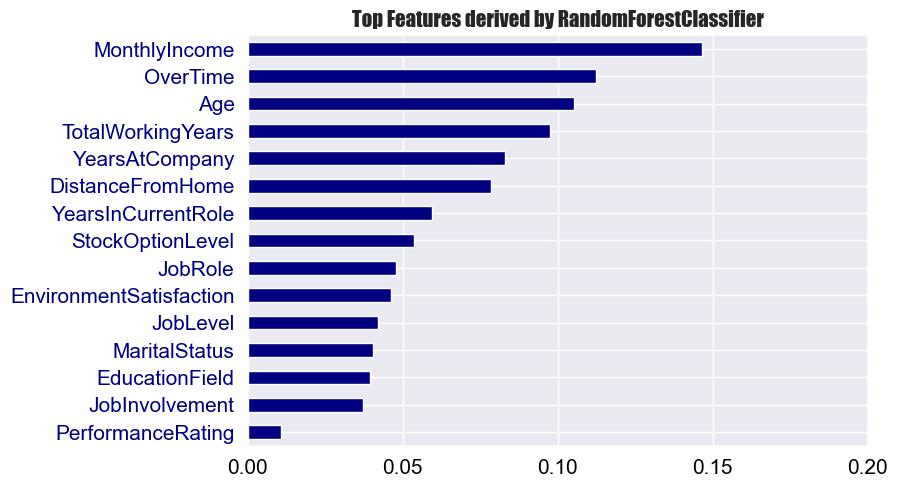

In [101]:
n = 16    # specify n (top n features)
feature_importances = pd.Series(rfc_model.feature_importances_, index=X_train.columns)
top_n_features = feature_importances.nlargest(n)
top_n_features.plot(kind='barh', figsize=[8, n/3], color='navy').invert_yaxis()
ticks_x = np.linspace(0, 0.2, 5)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=15, color='black')
plt.yticks(size=15, color='navy' )
plt.title('Top Features derived by RandomForestClassifier', family='fantasy', size=15)
print('Top', n, 'Features:', list(top_n_features.index))

In [102]:
# Predict the labels for train and test sets
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [103]:
# Predict the probabilities for the positive class for train and test sets
y_train_pred_proba = rfc.predict_proba(X_train)
y_test_pred_proba = rfc.predict_proba(X_test)

In [104]:
from sklearn.metrics import roc_curve, auc

# Calculate the applicable accuracy measures for train set
train_accuracy = accuracy_score(Y_train, y_train_pred)
train_precision = precision_score(Y_train, y_train_pred)
train_recall = recall_score(Y_train, y_train_pred)
train_f1_score = f1_score(Y_train, y_train_pred)
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, y_train_pred_proba[:,1])
train_roc_auc = auc(train_fpr, train_tpr)
train_confusion_matrix = confusion_matrix(Y_train, y_train_pred)
train_classification_report = classification_report(Y_train, y_train_pred)

# Print the accuracy measures for train set
print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1_score)
print("Train AUC Score:", train_roc_auc)
print("Train Confusion Matrix:\n", train_confusion_matrix)
print("Train Classification Report:\n", train_classification_report)
print('Train Log loss :', log_loss(Y_train, y_train_pred))

Train Accuracy: 0.91921768707483
Train Precision: 0.9478260869565217
Train Recall: 0.5505050505050505
Train F1 Score: 0.6964856230031949
Train AUC Score: 0.9881741752907398
Train Confusion Matrix:
 [[972   6]
 [ 89 109]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       978
           1       0.95      0.55      0.70       198

    accuracy                           0.92      1176
   macro avg       0.93      0.77      0.82      1176
weighted avg       0.92      0.92      0.91      1176

Train Log loss : 2.7901263223648782


In [105]:
# Calculate the applicable accuracy measures for test set
test_accuracy = accuracy_score(Y_test, y_test_pred)
test_precision = precision_score(Y_test, y_test_pred)
test_recall = recall_score(Y_test, y_test_pred)
test_f1_score = f1_score(Y_test, y_test_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, y_test_pred_proba[:,1])
test_roc_auc = auc(test_fpr, test_tpr)
test_confusion_matrix = confusion_matrix(Y_test, y_test_pred)
test_classification_report = classification_report(Y_test, y_test_pred)

# Print the accuracy measures for test set
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)
print("Test AUC Score:", test_roc_auc)
print("Test Confusion Matrix:\n", test_confusion_matrix)
print("Test Classification Report:\n", test_classification_report)
print('Test Log loss :', log_loss(Y_test, y_test_pred))

Test Accuracy: 0.8639455782312925
Test Precision: 0.45454545454545453
Test Recall: 0.1282051282051282
Test F1 Score: 0.19999999999999996
Test AUC Score: 0.6999497234791352
Test Confusion Matrix:
 [[249   6]
 [ 34   5]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.45      0.13      0.20        39

    accuracy                           0.86       294
   macro avg       0.67      0.55      0.56       294
weighted avg       0.82      0.86      0.83       294

Test Log loss : 4.699169569323158


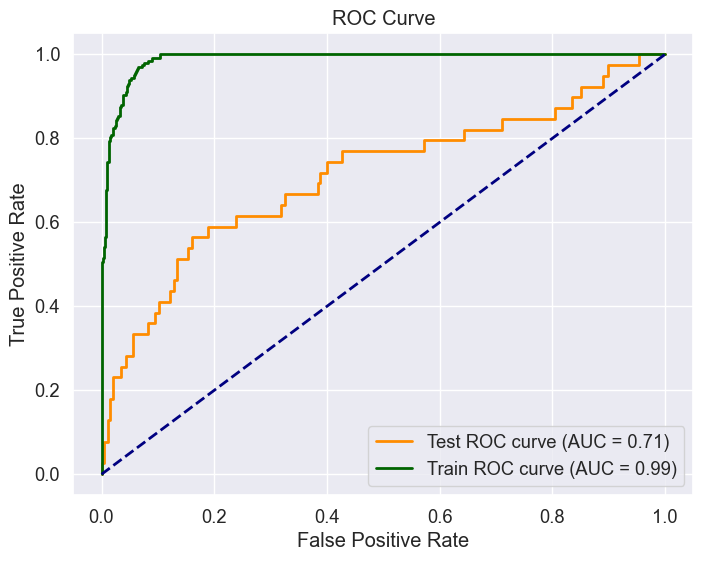

AUC score on testing data: 0.9881741752907398
AUC score on training data: 0.7121166415284061


In [106]:
from sklearn.metrics import roc_curve,auc

# Predict the probabilities of attrition for the test data
y_prob_test = rfc.predict_proba(X_test)[:, 1]

# Predict the probabilities of attrition for the test data
y_prob_train = rfc.predict_proba(X_train)[:, 1]

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve
fpr_test_rf1, tpr_test_rf1, thresholds_rf1 = roc_curve(Y_test, y_prob)
roc_auc_test_rf1 = auc(fpr_test_rf1, tpr_test_rf1)

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve
fpr_train_rf1, tpr_train_rf1, thresholds_train_rf1 = roc_curve(Y_train, y_prob_train)
roc_auc_train_rf1 = auc(fpr_train_rf1, tpr_train_rf1)

# Plot the ROC curves for train and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_rf1 , tpr_test_rf1, color='darkorange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test_rf1:.2f})')
plt.plot(fpr_train_rf1 , tpr_train_rf1, color='darkgreen', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train_rf1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print("AUC score on testing data:",roc_auc_train_rf1)
print("AUC score on training data:",roc_auc_test_rf1)

In [107]:
from prettytable import PrettyTable

train_accuracy =  0.920
train_precision = 0.948
train_recall = 0.560
train_f1score = 0.704
train_auc = 0.71
train_confusion_matrix = [[972,   6],[ 87 ,111]]
train_classification_report = """
                precision    recall  f1-score   support

           0       0.92      0.99      0.95       978
           1       0.95      0.56      0.70       198

    accuracy                           0.92      1176
   macro avg       0.93      0.78      0.83      1176
weighted avg       0.92      0.92      0.91      1176
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Train Metrics for RandomForestClassifier using Scikit-learn library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Train Accuracy", train_accuracy])
train_table.add_row(["Train Precision", train_precision])
train_table.add_row(["Train Recall", train_recall])
train_table.add_row(["Train F1-Score", train_f1score])
train_table.add_row(["Train AUC Score", train_auc])
train_table.add_row(["Train Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Train Classification Report", train_classification_report])

# Print the table
print(train_table)

+---------------------------------------------------------------------------------------+
|          Train Metrics for RandomForestClassifier using Scikit-learn library          |
+-----------------------------+---------------------------------------------------------+
|            Metric           |                          Value                          |
+-----------------------------+---------------------------------------------------------+
|        Train Accuracy       |                           0.92                          |
|       Train Precision       |                          0.948                          |
|         Train Recall        |                           0.56                          |
|        Train F1-Score       |                          0.704                          |
|       Train AUC Score       |                          0.989                          |
|    Train Confusion Matrix   |                  [[972, 6], [87, 111]]                  |
| Train Cl

In [139]:
from prettytable import PrettyTable

train_accuracy =   0.86
train_precision = 0.45
train_recall = 0.12
train_f1score =   0.19
train_auc = 0.98
train_confusion_matrix = [[249,   6],[ 34,   5]]
train_classification_report = """
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       255
           1       0.38      0.13      0.19        39

    accuracy                           0.86       294
   macro avg       0.63      0.55      0.56       294
weighted avg       0.81      0.86      0.82       294
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Test Metrics for RandomForestClassifier using Scikit-learn library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Test Accuracy", train_accuracy])
train_table.add_row(["Test Precision", train_precision])
train_table.add_row(["Test Recall", train_recall])
train_table.add_row(["Test F1-Score", train_f1score])
train_table.add_row(["Test AUC Score", train_auc])
train_table.add_row(["Test Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Test Classification Report", train_classification_report])

# Print the table
print(train_table)

+-------------------------------------------------------------------------------------+
|          Test Metrics for RandomForestClassifier using Scikit-learn library         |
+----------------------------+--------------------------------------------------------+
|           Metric           |                         Value                          |
+----------------------------+--------------------------------------------------------+
|       Test Accuracy        |                          0.86                          |
|       Test Precision       |                          0.45                          |
|        Test Recall         |                          0.12                          |
|       Test F1-Score        |                          0.19                          |
|       Test AUC Score       |                          0.98                          |
|   Test Confusion Matrix    |                  [[249, 6], [34, 5]]                   |
| Test Classification Report |  

# XGBoost library implementation for RandomForestClassifier

In [109]:
# Instantiate the XGBoost classifier
xgb_clf = xgb.XGBRFClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the training data
xgb_clf.fit(X_train, Y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=10, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='binary:logistic', predictor=None, random_state=42,
                reg_alpha=None, ...)

In [110]:
# Predict the classes for the training and testing data
train_preds = xgb_clf.predict(X_train)
test_preds = xgb_clf.predict(X_test)

In [112]:
from sklearn.metrics import roc_curve, auc

# Calculate the applicable accuracy measures for train set
train_accuracy = accuracy_score(Y_train, train_preds)
train_precision = precision_score(Y_train, train_preds)
train_recall = recall_score(Y_train, train_preds)
train_f1_score = f1_score(Y_train, train_preds)
train_confusion_matrix = confusion_matrix(Y_train, train_preds)
train_classification_report = classification_report(Y_train, train_preds)

# Print the accuracy measures for train set
print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1_score)
print("Train Confusion Matrix:\n", train_confusion_matrix)
print("Train Classification Report:\n", train_classification_report)
print('Train Log loss :', log_loss(Y_train, train_preds))

Train Accuracy: 0.9370748299319728
Train Precision: 0.9626865671641791
Train Recall: 0.6515151515151515
Train F1 Score: 0.7771084337349397
Train Confusion Matrix:
 [[973   5]
 [ 69 129]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       978
           1       0.96      0.65      0.78       198

    accuracy                           0.94      1176
   macro avg       0.95      0.82      0.87      1176
weighted avg       0.94      0.94      0.93      1176

Train Log loss : 2.173361778240257


In [114]:
from sklearn.metrics import roc_curve, auc

# Calculate the applicable accuracy measures for train set
test_accuracy = accuracy_score(Y_test, test_preds)
test_precision = precision_score(Y_test, test_preds)
test_recall = recall_score(Y_test, test_preds)
test_f1_score = f1_score(Y_test, test_preds)
test_confusion_matrix = confusion_matrix(Y_test, test_preds)
test_classification_report = classification_report(Y_test, test_preds)

# Print the accuracy measures for train set
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)
print("Test Confusion Matrix:\n", test_confusion_matrix)
print("Train Classification Report:\n", test_classification_report)
print('Train Log loss :', log_loss(Y_test, test_preds))

Test Accuracy: 0.8707482993197279
Test Precision: 0.5384615384615384
Test Recall: 0.1794871794871795
Test F1 Score: 0.2692307692307692
Test Confusion Matrix:
 [[249   6]
 [ 32   7]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.54      0.18      0.27        39

    accuracy                           0.87       294
   macro avg       0.71      0.58      0.60       294
weighted avg       0.84      0.87      0.84       294

Train Log loss : 4.4642119067727455


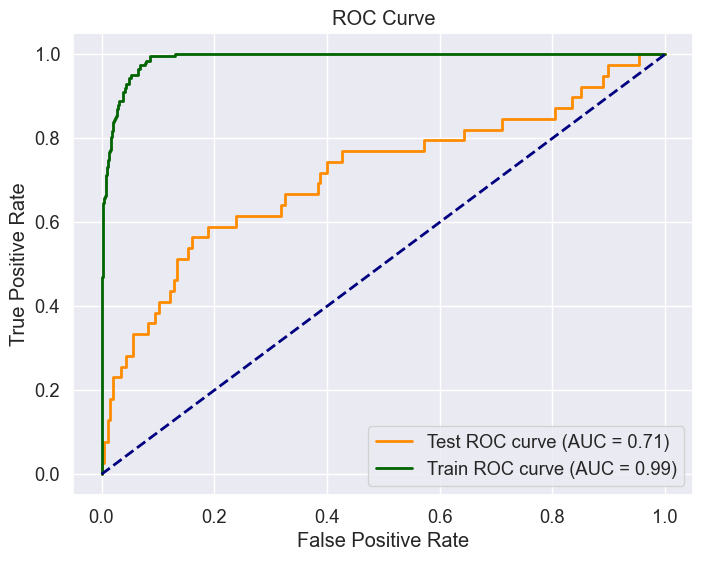

AUC score on testing data: 0.989129536675549
AUC score on training data: 0.7121166415284061


In [115]:
from sklearn.metrics import roc_curve,auc

# Predict the probabilities of attrition for the test data
y_prob_test = xgb_clf.predict_proba(X_test)[:, 1]

# Predict the probabilities of attrition for the test data
y_prob_train = xgb_clf.predict_proba(X_train)[:, 1]

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve
fpr_test_rf2, tpr_test_rf2, thresholds = roc_curve(Y_test, y_prob)
roc_auc_test_rf2 = auc(fpr_test_rf2, tpr_test_rf2)

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve
fpr_train_rf2, tpr_train_rf2, thresholds_train_rf2 = roc_curve(Y_train, y_prob_train)
roc_auc_train_rf2 = auc(fpr_train_rf2, tpr_train_rf2)
# Plot the ROC curves for train and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_rf2, tpr_test_rf2, color='darkorange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test_rf2:.2f})')
plt.plot(fpr_train_rf2, tpr_train_rf2, color='darkgreen', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train_rf2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print("AUC score on testing data:",roc_auc_train_rf2)
print("AUC score on training data:",roc_auc_test_rf2)

In [116]:
from prettytable import PrettyTable

train_accuracy = 0.937
train_precision =  0.962
train_recall = 0.651
train_f1score = 0.777
train_auc = 0.712
train_confusion_matrix =  [[973,  5],[ 69, 129]]
train_classification_report = """
                precision    recall  f1-score   support

           0       0.93      0.99      0.96       978
           1       0.96      0.65      0.78       198

    accuracy                           0.94      1176
   macro avg       0.95      0.82      0.87      1176
weighted avg       0.94      0.94      0.93      1176
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Train Metrics for RandomForestClassifier using XGBoost library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Train Accuracy", train_accuracy])
train_table.add_row(["Train Precision", train_precision])
train_table.add_row(["Train Recall", train_recall])
train_table.add_row(["Train F1-Score", train_f1score])
train_table.add_row(["Train AUC Score", train_auc])
train_table.add_row(["Train Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Train Classification Report", train_classification_report])

# Print the table
print(train_table)

+---------------------------------------------------------------------------------------+
|             Train Metrics for RandomForestClassifier using XGBoost library            |
+-----------------------------+---------------------------------------------------------+
|            Metric           |                          Value                          |
+-----------------------------+---------------------------------------------------------+
|        Train Accuracy       |                          0.937                          |
|       Train Precision       |                          0.962                          |
|         Train Recall        |                          0.651                          |
|        Train F1-Score       |                          0.777                          |
|       Train AUC Score       |                          0.712                          |
|    Train Confusion Matrix   |                  [[973, 5], [69, 129]]                  |
| Train Cl

In [140]:
from prettytable import PrettyTable

train_accuracy =   0.87
train_precision = 0.53
train_recall =  0.17
train_f1score =  0.26
train_auc =  0.98
train_confusion_matrix = [[249,   6],[ 32,   7]]
train_classification_report = """
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.54      0.18      0.27        39

    accuracy                           0.87       294
   macro avg       0.71      0.58      0.60       294
weighted avg       0.84      0.87      0.84       294
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Test Metrics for RandomForestClassifier using XGBoost library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Test Accuracy", train_accuracy])
train_table.add_row(["Test Precision", train_precision])
train_table.add_row(["Test Recall", train_recall])
train_table.add_row(["Test F1-Score", train_f1score])
train_table.add_row(["Test AUC Score", train_auc])
train_table.add_row(["Test Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Test Classification Report", train_classification_report])

# Print the table
print(train_table)

+-------------------------------------------------------------------------------------+
|            Test Metrics for RandomForestClassifier using XGBoost library            |
+----------------------------+--------------------------------------------------------+
|           Metric           |                         Value                          |
+----------------------------+--------------------------------------------------------+
|       Test Accuracy        |                          0.87                          |
|       Test Precision       |                          0.53                          |
|        Test Recall         |                          0.17                          |
|       Test F1-Score        |                          0.26                          |
|       Test AUC Score       |                          0.98                          |
|   Test Confusion Matrix    |                  [[249, 6], [32, 7]]                   |
| Test Classification Report |  

# SVM

# SVM using Scikit-learn:

In [119]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC

# Instantiate the oversampler
oversampler = RandomOverSampler(random_state=42)

# Resample the training data
X_train_resampled, Y_train_resampled = oversampler.fit_resample(X_train, Y_train)

# Train the SVM classifier on the resampled data
svm = SVC(probability=True)
svm.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the resampled training data
y_train_pred = svm.predict(X_train_resampled)

# Calculate the evaluation metrics on the resampled training data
train_accuracy = accuracy_score(Y_train_resampled, y_train_pred)
train_precision = precision_score(Y_train_resampled, y_train_pred)
train_recall = recall_score(Y_train_resampled, y_train_pred)
train_f1 = f1_score(Y_train_resampled, y_train_pred)
train_cm = confusion_matrix(Y_train_resampled, y_train_pred)
train_classification_report = classification_report(Y_train_resampled, y_train_pred)

print("Training Accuracy: ", train_accuracy)
print("Training Precision: ", train_precision)
print("Training Recall: ", train_recall)
print("Training F1 Score: ", train_f1)
print("Training Confusion Matrix: ")
print(train_cm)
print("Training Classification Report: \n", train_classification_report)
print('Test Log loss :', log_loss(Y_train_resampled, y_train_pred))

# Make predictions on the test data
y_test_pred = svm.predict(X_test)

# Calculate the evaluation metrics on the test data
test_accuracy = accuracy_score(Y_test, y_test_pred)
test_precision = precision_score(Y_test, y_test_pred)
test_recall = recall_score(Y_test, y_test_pred)
test_f1 = f1_score(Y_test, y_test_pred)
test_cm = confusion_matrix(Y_test, y_test_pred)
test_classification_report = classification_report(Y_test, y_test_pred)

print("Test Accuracy: ", test_accuracy)
print("Test Precision: ", test_precision)
print("Test Recall: ", test_recall)
print("Test F1 Score: ", test_f1)
print("Test Confusion Matrix: ")
print(test_cm)
print("Test Classification Report: \n", test_classification_report)
print('Test Log loss :', log_loss(Y_test, y_test_pred))

C:\Users\ketak\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training Accuracy:  0.6380368098159509
Training Precision:  0.6537585421412301
Training Recall:  0.5869120654396728
Training F1 Score:  0.6185344827586207
Training Confusion Matrix: 
[[674 304]
 [404 574]]
Training Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.69      0.66       978
           1       0.65      0.59      0.62       978

    accuracy                           0.64      1956
   macro avg       0.64      0.64      0.64      1956
weighted avg       0.64      0.64      0.64      1956

Test Log loss : 12.501889961766638
Test Accuracy:  0.7380952380952381
Test Precision:  0.21212121212121213
Test Recall:  0.358974358974359
Test F1 Score:  0.26666666666666666
Test Confusion Matrix: 
[[203  52]
 [ 25  14]]
Test Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       255
           1       0.21      0.36      0.27        39

    accuracy     

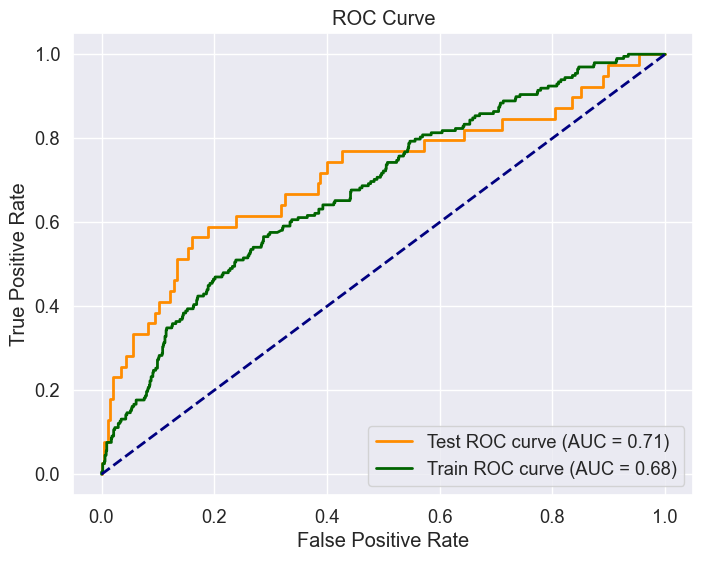

AUC score on testing data: 0.6793678089690359
AUC score on training data: 0.7121166415284061


In [120]:
from sklearn.metrics import roc_curve,auc

# Predict the probabilities of attrition for the test data
y_prob_test = svm.predict_proba(X_test)[:, 1]

# Predict the probabilities of attrition for the test data
y_prob_train = svm.predict_proba(X_train)[:, 1]

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve
fpr_test_svm1, tpr_test_svm1, thresholds_svm1 = roc_curve(Y_test, y_prob)
roc_auc_test_svm1 = auc(fpr_test_svm1, tpr_test_svm1)

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve
fpr_train_svm1, tpr_train_svm1, thresholds_train_svm1 = roc_curve(Y_train, y_prob_train)
roc_auc_train_svm1 = auc(fpr_train_svm1, tpr_train_svm1)
# Plot the ROC curves for train and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_svm1, tpr_test_svm1, color='darkorange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test_svm1:.2f})')
plt.plot(fpr_train_svm1, tpr_train_svm1, color='darkgreen', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train_svm1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print("AUC score on testing data:",roc_auc_train_svm1)
print("AUC score on training data:",roc_auc_test_svm1)

In [121]:
from prettytable import PrettyTable

train_accuracy = 0.638
train_precision = 0.653
train_recall =  0.586
train_f1score = 0.618
train_auc = 0.712
train_confusion_matrix = [[674, 304],[404, 574]]
train_classification_report = """
                precision    recall  f1-score   support

           0       0.63      0.69      0.66       978
           1       0.65      0.59      0.62       978

    accuracy                           0.64      1956
   macro avg       0.64      0.64      0.64      1956
weighted avg       0.64      0.64      0.64      1956
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Train Metrics for SVM using Scikit-learn"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Train Accuracy", train_accuracy])
train_table.add_row(["Train Precision", train_precision])
train_table.add_row(["Train Recall", train_recall])
train_table.add_row(["Train F1-Score", train_f1score])
train_table.add_row(["Train AUC Score", train_auc])
train_table.add_row(["Train Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Train Classification Report", train_classification_report])

# Print the table
print(train_table)

+---------------------------------------------------------------------------------------+
|                        Train Metrics for SVM using Scikit-learn                       |
+-----------------------------+---------------------------------------------------------+
|            Metric           |                          Value                          |
+-----------------------------+---------------------------------------------------------+
|        Train Accuracy       |                          0.638                          |
|       Train Precision       |                          0.653                          |
|         Train Recall        |                          0.586                          |
|        Train F1-Score       |                          0.618                          |
|       Train AUC Score       |                          0.712                          |
|    Train Confusion Matrix   |                 [[674, 304], [404, 574]]                |
| Train Cl

In [141]:
from prettytable import PrettyTable

train_accuracy =   0.73
train_precision = 0.21
train_recall =  0.35
train_f1score =   0.26
train_auc = 0.67
train_confusion_matrix = [[203,  52],[ 25,  14]]
train_classification_report = """
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       255
           1       0.21      0.36      0.27        39

    accuracy                           0.74       294
   macro avg       0.55      0.58      0.55       294
weighted avg       0.80      0.74      0.76       294
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Test Metrics for SVM using Scikit-learn"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Test Accuracy", train_accuracy])
train_table.add_row(["Test Precision", train_precision])
train_table.add_row(["Test Recall", train_recall])
train_table.add_row(["Test F1-Score", train_f1score])
train_table.add_row(["Test AUC Score", train_auc])
train_table.add_row(["Test Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Test Classification Report", train_classification_report])

# Print the table
print(train_table)

+-------------------------------------------------------------------------------------+
|                       Test Metrics for SVM using Scikit-learn                       |
+----------------------------+--------------------------------------------------------+
|           Metric           |                         Value                          |
+----------------------------+--------------------------------------------------------+
|       Test Accuracy        |                          0.73                          |
|       Test Precision       |                          0.21                          |
|        Test Recall         |                          0.35                          |
|       Test F1-Score        |                          0.26                          |
|       Test AUC Score       |                          0.67                          |
|   Test Confusion Matrix    |                 [[203, 52], [25, 14]]                  |
| Test Classification Report |  

# SVM using XGBoost:

In [123]:
# Convert the data into a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Define the SVM parameters
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

# Train the SVM model
num_round = 10
bst = xgb.train(param, dtrain, num_round)

# Make predictions on the training and testing sets
y_train_pred = bst.predict(dtrain)
y_train_pred = [round(pred) for pred in y_train_pred]
y_test_pred = bst.predict(dtest)
y_test_pred = [round(pred) for pred in y_test_pred]

In [124]:
# Calculate accuracy, precision, recall and f1 score for train dataset
train_accuracy = accuracy_score(Y_train, y_train_pred)
train_precision = precision_score(Y_train, y_train_pred)
train_recall = recall_score(Y_train, y_train_pred)
train_f1_score = f1_score(Y_train, y_train_pred)
train_cm = confusion_matrix(Y_train, y_train_pred)
train_classification_report = classification_report(Y_train, y_train_pred)

print('Train Accuracy:', train_accuracy)
print('Train Precision:', train_precision)
print('Train Recall:', train_recall)
print('Train F1 Score:', train_f1_score)
print("Training Confusion Matrix: ")
print(train_cm)
print('Train Classification Report:\n', train_classification_report)
print('Train Log loss :', log_loss(Y_train, y_train_pred))

Train Accuracy: 0.8826530612244898
Train Precision: 0.7586206896551724
Train Recall: 0.4444444444444444
Train F1 Score: 0.5605095541401274
Training Confusion Matrix: 
[[950  28]
 [110  88]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       978
           1       0.76      0.44      0.56       198

    accuracy                           0.88      1176
   macro avg       0.83      0.71      0.75      1176
weighted avg       0.87      0.88      0.87      1176

Train Log loss : 4.053038717028674


In [125]:
# Calculate accuracy, precision, recall and f1 score for train dataset
test_accuracy = accuracy_score(Y_test, y_test_pred)
test_precision = precision_score(Y_test, y_test_pred)
test_recall = recall_score(Y_test, y_test_pred)
test_f1_score = f1_score(Y_test, y_test_pred)
test_cm = confusion_matrix(Y_test, y_test_pred)
test_classification_report = classification_report(Y_test, y_test_pred)

print('Test Accuracy:', test_accuracy)
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)
print('Test F1 Score:', test_f1_score)
print("Test Confusion Matrix: ")
print(test_cm)
print('Test Classification Report:\n', test_classification_report)
print('Test Log loss :', log_loss(Y_test, y_test_pred))

Test Accuracy: 0.8605442176870748
Test Precision: 0.46153846153846156
Test Recall: 0.3076923076923077
Test F1 Score: 0.3692307692307692
Test Confusion Matrix: 
[[241  14]
 [ 27  12]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       255
           1       0.46      0.31      0.37        39

    accuracy                           0.86       294
   macro avg       0.68      0.63      0.65       294
weighted avg       0.84      0.86      0.85       294

Test Log loss : 4.816670158351568


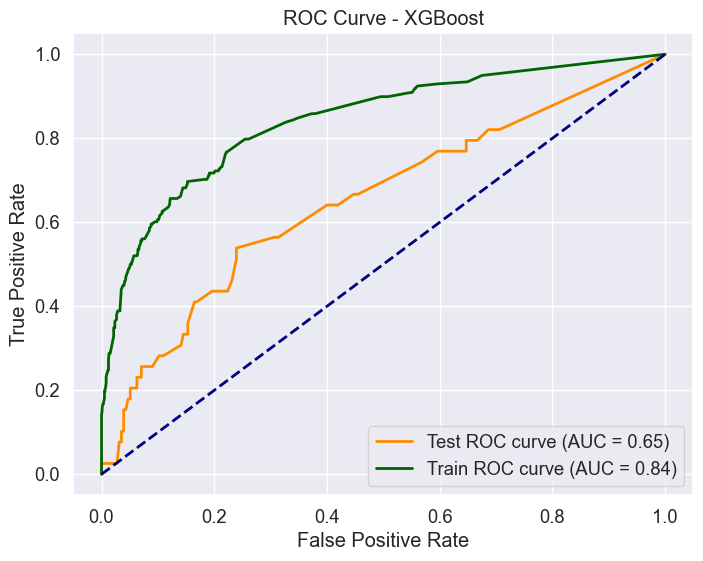

AUC score on testing data: 0.8425951746503894
AUC score on training data: 0.6526897938662645


In [126]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# Predict the scores of attrition for the test data
y_score_test = xgb_model.predict(dtest, output_margin=True)

# Predict the scores of attrition for the train data
y_score_train = xgb_model.predict(dtrain, output_margin=True)

# Convert the scores to probabilities
y_prob_test = 1 / (1 + np.exp(-y_score_test))
y_prob_train = 1 / (1 + np.exp(-y_score_train))

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve
fpr_test_svm2, tpr_test_svm2, thresholds_svm2 = roc_curve(Y_test, y_prob_test)
roc_auc_test_svm2 = auc(fpr_test_svm2, tpr_test_svm2)

fpr_train_svm2, tpr_train_svm2, thresholds_train_svm2 = roc_curve(Y_train, y_prob_train)
roc_auc_train_svm2= auc(fpr_train_svm2, tpr_train_svm2)

# Plot the ROC curves for train and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_svm2, tpr_test_svm2, color='darkorange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test_svm2:.2f})')
plt.plot(fpr_train_svm2, tpr_train_svm2, color='darkgreen', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train_svm2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()
print("AUC score on testing data:",roc_auc_train_svm2)
print("AUC score on training data:",roc_auc_test_svm2)

In [127]:
from prettytable import PrettyTable

train_accuracy = 0.882
train_precision = 0.758
train_recall = 0.444
train_f1score =0.560
train_auc = 0.652
train_confusion_matrix = [[950,  28],[110 , 88]]
train_classification_report = """
                precision    recall  f1-score   support

           0       0.90      0.97      0.93       978
           1       0.76      0.44      0.56       198

    accuracy                           0.88      1176
   macro avg       0.83      0.71      0.75      1176
weighted avg       0.87      0.88      0.87      1176
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Train Metrics for SVM using XGBoost library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Train Accuracy", train_accuracy])
train_table.add_row(["Train Precision", train_precision])
train_table.add_row(["Train Recall", train_recall])
train_table.add_row(["Train F1-Score", train_f1score])
train_table.add_row(["Train AUC Score", train_auc])
train_table.add_row(["Train Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Train Classification Report", train_classification_report])

# Print the table
print(train_table)

+---------------------------------------------------------------------------------------+
|                      Train Metrics for SVM using XGBoost library                      |
+-----------------------------+---------------------------------------------------------+
|            Metric           |                          Value                          |
+-----------------------------+---------------------------------------------------------+
|        Train Accuracy       |                          0.882                          |
|       Train Precision       |                          0.758                          |
|         Train Recall        |                          0.444                          |
|        Train F1-Score       |                           0.56                          |
|       Train AUC Score       |                          0.652                          |
|    Train Confusion Matrix   |                  [[950, 28], [110, 88]]                 |
| Train Cl

In [142]:
from prettytable import PrettyTable

train_accuracy =   0.86
train_precision = 0.46
train_recall =  0.30
train_f1score =  0.36
train_auc = 0.84
train_confusion_matrix = [[241 , 14],[ 27,  12]]
train_classification_report = """
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       255
           1       0.46      0.31      0.37        39

    accuracy                           0.86       294
   macro avg       0.68      0.63      0.65       294
weighted avg       0.84      0.86      0.85       294
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Test Metrics for SVM using XGBoost library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Test Accuracy", train_accuracy])
train_table.add_row(["Test Precision", train_precision])
train_table.add_row(["Test Recall", train_recall])
train_table.add_row(["Test F1-Score", train_f1score])
train_table.add_row(["Test AUC Score", train_auc])
train_table.add_row(["Test Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Test Classification Report", train_classification_report])

# Print the table
print(train_table)

+-------------------------------------------------------------------------------------+
|                      Test Metrics for SVM using XGBoost library                     |
+----------------------------+--------------------------------------------------------+
|           Metric           |                         Value                          |
+----------------------------+--------------------------------------------------------+
|       Test Accuracy        |                          0.86                          |
|       Test Precision       |                          0.46                          |
|        Test Recall         |                          0.3                           |
|       Test F1-Score        |                          0.36                          |
|       Test AUC Score       |                          0.84                          |
|   Test Confusion Matrix    |                 [[241, 14], [27, 12]]                  |
| Test Classification Report |  

# Combine score and graph 

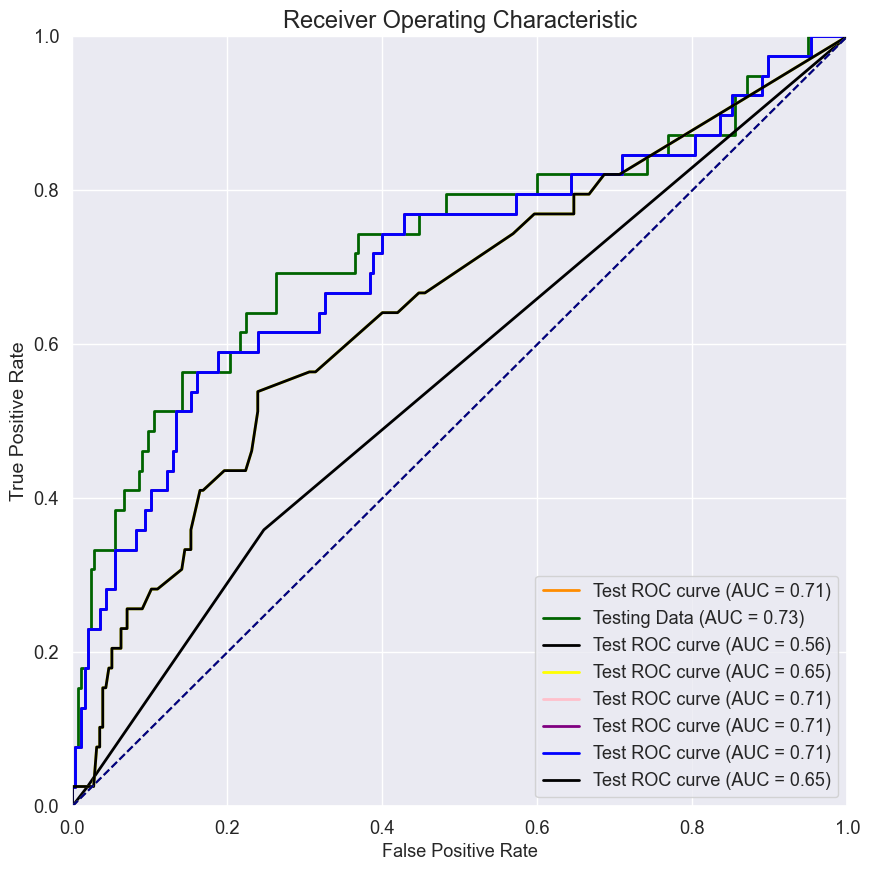

In [156]:
# plot the ROC curves
plt.figure(figsize=(10,10))

# plot ROC curves and AUC for train and test sets
plt.plot(fpr_lg1, tpr_lg1, color='darkorange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_lg1:.2f})')
plt.plot(fpr_test_lgr2, tpr_test_lgr2, color='darkgreen', lw=2, label='Testing Data (AUC = %0.2f)' % roc_auc_test_lgr2)
plt.plot(fpr_test_dt1, tpr_test_dt1, color='black', lw=2, label=f'Test ROC curve (AUC = {roc_auc_dt1:.2f})')
plt.plot(fpr_test_dt2, tpr_test_dt2, color='yellow', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test_dt2:.2f})')
plt.plot(fpr_test_rf1 , tpr_test_rf1, color='pink', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test_rf1:.2f})')
plt.plot(fpr_test_rf2, tpr_test_rf2, color='purple', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test_rf2:.2f})')
plt.plot(fpr_test_svm1, tpr_test_svm1, color='blue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test_svm1:.2f})')
plt.plot(fpr_test_svm2, tpr_test_svm2, color='black', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test_svm2:.2f})')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

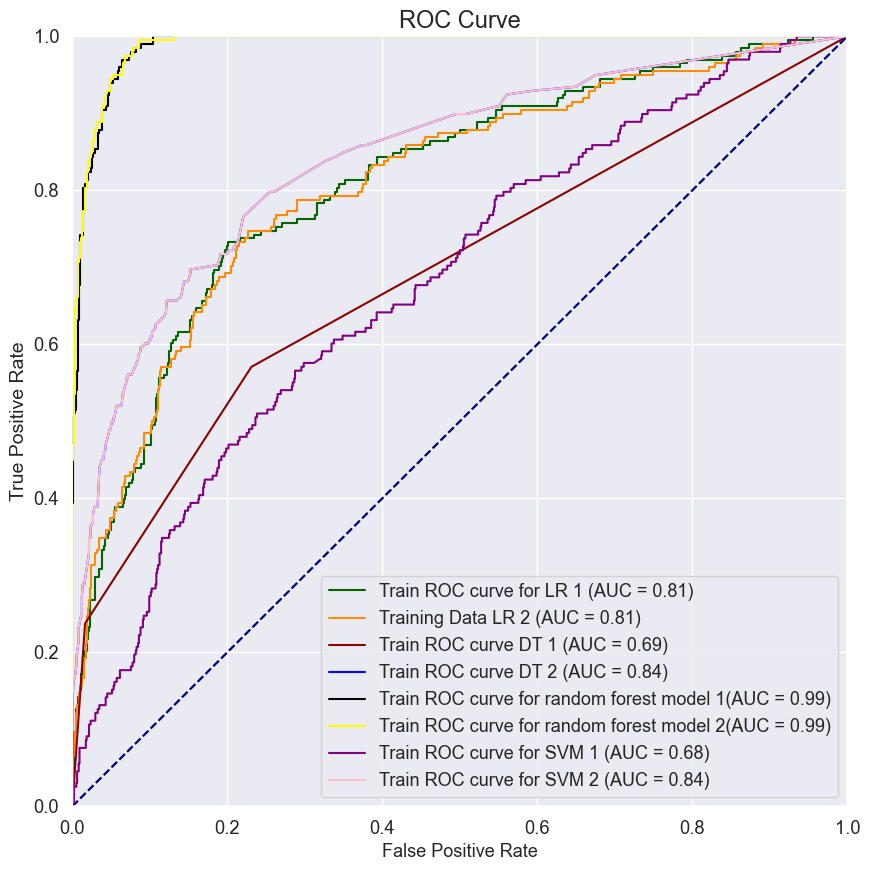

In [157]:
# plot the ROC curves
plt.figure(figsize=(10,10))

# plot ROC curves and AUC for train and test sets
plt.plot(fpr_train_lg1, tpr_train_lg1, color='darkgreen', label=f'Train ROC curve for LR 1 (AUC = {roc_auc_train_lg1:.2f})')
plt.plot(fpr_train_lgr2, tpr_train_lgr2, color='darkorange', label='Training Data LR 2 (AUC = %0.2f)' % roc_auc_train_lgr2)
plt.plot(fpr_train_dt1, tpr_train_dt1, color='darkred',label=f'Train ROC curve DT 1 (AUC = {roc_auc_train_dt1:.2f})')
plt.plot(fpr_train_dt2, tpr_train_dt2, color='blue',label=f'Train ROC curve DT 2 (AUC = {roc_auc_train_dt2:.2f})')
plt.plot(fpr_train_rf1 , tpr_train_rf1, color='black', label=f'Train ROC curve for random forest model 1(AUC = {roc_auc_train_rf1:.2f})')
plt.plot(fpr_train_rf2, tpr_train_rf2, color='yellow',  label=f'Train ROC curve for random forest model 2(AUC = {roc_auc_train_rf2:.2f})')
plt.plot(fpr_train_svm1, tpr_train_svm1, color='purple', label=f'Train ROC curve for SVM 1 (AUC = {roc_auc_train_svm1:.2f})')
plt.plot(fpr_train_svm2, tpr_train_svm2, color='pink',  label=f'Train ROC curve for SVM 2 (AUC = {roc_auc_train_svm2:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

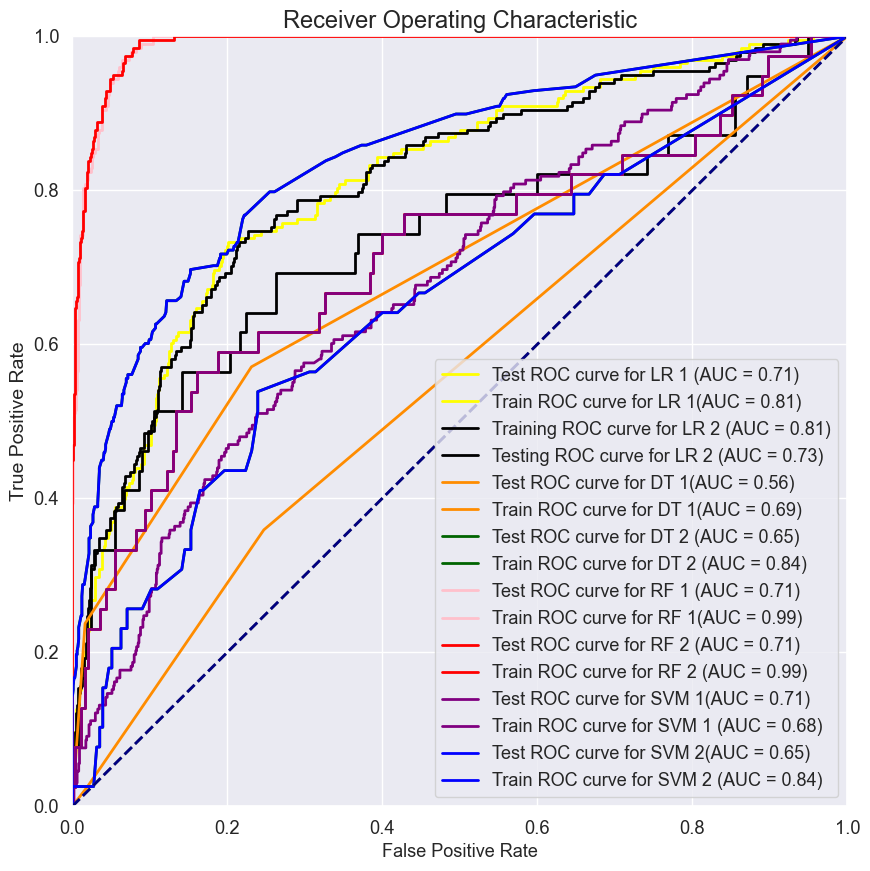

In [158]:
# plot the ROC curves
lw = 2 # define line width here

plt.figure(figsize=(10,10))

# plot ROC curves and AUC for train and test sets
plt.plot(fpr_lg1, tpr_lg1, color='yellow', lw=2, label=f'Test ROC curve for LR 1 (AUC = {roc_auc_lg1:.2f})')
plt.plot(fpr_train_lg1, tpr_train_lg1, color='yellow', lw=2, label=f'Train ROC curve for LR 1(AUC = {roc_auc_train_lg1:.2f})')
p

plt.plot(fpr_train_lgr2, tpr_train_lgr2, color='black', lw=2, label='Training ROC curve for LR 2 (AUC = %0.2f)' % roc_auc_train_lgr2)
plt.plot(fpr_test_lgr2, tpr_test_lgr2, color='black', lw=2, label='Testing ROC curve for LR 2 (AUC = %0.2f)' % roc_auc_test_lgr2)

plt.plot(fpr_test_dt1, tpr_test_dt1, color='darkorange', lw=2, label=f'Test ROC curve for DT 1(AUC = {roc_auc_dt1:.2f})')
plt.plot(fpr_train_dt1, tpr_train_dt1, color='darkorange', lw=2, label=f'Train ROC curve for DT 1(AUC = {roc_auc_train_dt1:.2f})')

plt.plot(fpr_test_dt2, tpr_test_dt2, color='darkgreen', lw=2, label=f'Test ROC curve for DT 2 (AUC = {roc_auc_test_dt2:.2f})')
plt.plot(fpr_train_dt2, tpr_train_dt2, color='darkgreen', lw=2, label=f'Train ROC curve for DT 2 (AUC = {roc_auc_train_dt2:.2f})')

plt.plot(fpr_test_rf1 , tpr_test_rf1, color='pink', lw=2, label=f'Test ROC curve for RF 1 (AUC = {roc_auc_test_rf1:.2f})')
plt.plot(fpr_train_rf1 , tpr_train_rf1, color='pink', lw=2, label=f'Train ROC curve for RF 1(AUC = {roc_auc_train_rf1:.2f})')

plt.plot(fpr_test_rf2, tpr_test_rf2, color='red', lw=2, label=f'Test ROC curve for RF 2 (AUC = {roc_auc_test_rf2:.2f})')
plt.plot(fpr_train_rf2, tpr_train_rf2, color='red', lw=2, label=f'Train ROC curve for RF 2 (AUC = {roc_auc_train_rf2:.2f})')

plt.plot(fpr_test_svm1, tpr_test_svm1, color='purple', lw=2, label=f'Test ROC curve for SVM 1(AUC = {roc_auc_test_svm1:.2f})')
plt.plot(fpr_train_svm1, tpr_train_svm1, color='purple', lw=2, label=f'Train ROC curve for SVM 1 (AUC = {roc_auc_train_svm1:.2f})')

plt.plot(fpr_test_svm2, tpr_test_svm2, color='blue', lw=2, label=f'Test ROC curve for SVM 2(AUC = {roc_auc_test_svm2:.2f})')
plt.plot(fpr_train_svm2, tpr_train_svm2, color='blue', lw=2, label=f'Train ROC curve for SVM 2 (AUC = {roc_auc_train_svm2:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

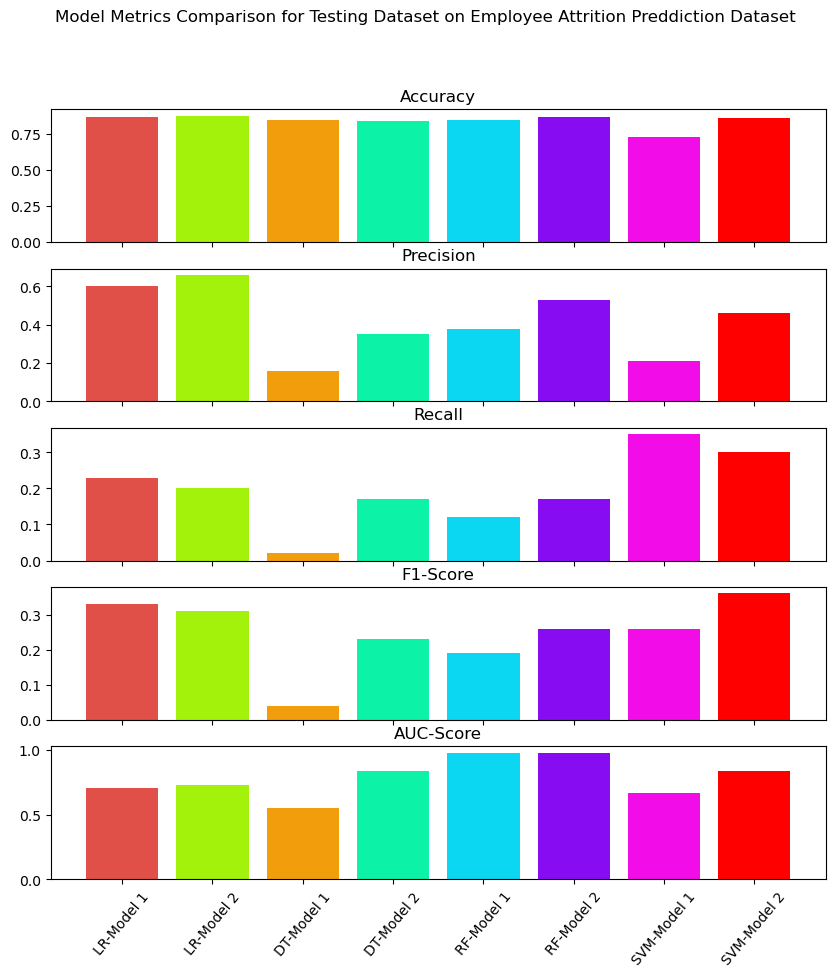

In [3]:
import matplotlib.pyplot as plt
import numpy as np

models = ['LR-Model 1', 'LR-Model 2', 'DT-Model 1', 'DT-Model 2', 'RF-Model 1', 'RF-Model 2','SVM-Model 1','SVM-Model 2']
accuracy = np.array([0.87, 0.88, 0.85, 0.84,0.85, 0.87, 0.73,  0.86])
precision = np.array([0.6, 0.66, 0.16, 0.35, 0.38, 0.53, 0.21,0.46])
recall = np.array([0.23, 0.20, 0.02, 0.17, 0.12, 0.17, 0.35,0.30])
f1_score = np.array([0.33, 0.31, 0.04, 0.23, 0.19, 0.26, 0.26, 0.36])
AUC = np.array([0.71, 0.73, 0.55, 0.84, 0.98, 0.98, 0.67, 0.84])

fig, axs = plt.subplots(5, sharex=True, figsize=(10,10))
fig.suptitle('Model Metrics Comparison for Testing Dataset on Employee Attrition Preddiction Dataset')

axs[0].bar(models, accuracy, color=['#e04f48', '#a2f20c', '#f29e0c', '#0cf2a6', '#0cd7f2', '#870cf2', '#f20ce7', 'red'])
axs[0].set_title('Accuracy')

axs[1].bar(models, precision, color=['#e04f48', '#a2f20c', '#f29e0c', '#0cf2a6', '#0cd7f2', '#870cf2', '#f20ce7', 'red'])
axs[1].set_title('Precision')

axs[2].bar(models, recall, color=['#e04f48', '#a2f20c', '#f29e0c', '#0cf2a6', '#0cd7f2', '#870cf2', '#f20ce7', 'red'])
axs[2].set_title('Recall')

axs[3].bar(models, f1_score, color=['#e04f48', '#a2f20c', '#f29e0c', '#0cf2a6', '#0cd7f2', '#870cf2', '#f20ce7', 'red'])
axs[3].set_title('F1-Score')

axs[4].bar(models, AUC, color=['#e04f48', '#a2f20c', '#f29e0c', '#0cf2a6', '#0cd7f2', '#870cf2', '#f20ce7', 'red'])
axs[4].set_title('AUC-Score')

plt.xticks(rotation=50)
plt.show()